# Top Countries for Middle-Class Markets: A Guide for Business Expansion
## Overview
Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators.

### Business Goal
We will use metrics from this data to help stakeholders identify the best countries to open businesses targeting middle-class consumers.

### Metrics to investigate:
1. **GDP per capita (Price and inflation-adjusted, in PPP$2021):** Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2021 prices, PPP based on 2021 ICP). We will use this to determine which countries have high purchasing power and market potential.
    - File: `gdp_pcap_21.csv`
2. **Population Size:** Total population counts the number of inhabitants in the territory. We will use this to identify which countries have a big customer base.
    - File: `pop.csv` 
4. **Population Growth (annual %):** Annual population growth rate for year t is the exponential rate of growth of midyear population from year t-1 to t, expressed as a percentage. The population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. We will use this metric to identify which countries will have a growing market.
    - File: `population_growth_annual_percent.csv`
5. **Urban population (% of total):** Urban population refers to people living in urban areas as defined by national statistical offices. The data are collected and smoothed by United Nations Population Division. It will help determine the countries that are more likely to have better infrastructure and also urban areas are easy to target marketing and distribution.
    - File: `urban_population_percent_of_total.csv`
6. **Human Development Index (HDI):** Human Development Index is an index used to rank countries by level of "human development". It contains three dimensions: health level, educational level, and living standard. We are going to use this to identify countries that may have skilled laborers.
    - File: `hdi_human_development_index.csv`
7. **Ease of doing business score (0 = lowest performance to 100 = best performance):** It evaluates the regulatory environment and ease of starting and operating a business in a country.
    - File: `ic_bus_dfrn_xq.csv`
8. **Cost of Business Start-Up Procedures:** Cost to register a business is normalized by presenting it as a percentage of gross national income (GNI) per capita. It will help identify the countries with low-start costs.
    - File: `ic_reg_cost_pc_zs`

We are going to use the `ddf--entities--geo--country.csv` file, as it contains information about each country, such as the continent they belong to.
### Questions to Answer:

1. Which countries had the highest GDP per capita in 2019? List the top 10.  
2. Which countries had the largest population sizes in 2019? List the top 10.  
3. Which countries had the highest population growth rates in 2019? List the top 10.  
4. Which countries had the highest Human Development Index (HDI) in 2019? List the top 10.  
5. Which countries had the best Ease of Doing Business scores in 2019? List the top 10.  
6. Which countries had the lowest costs for business start-up procedures in 2019? List the top 10.  
7. Which countries had the highest urban population rates in 2019? List the top 10.  
8. What is the relationship between the Ease of Doing Business score and the cost of business start-up procedures by country?  
9. What is the relationship between GDP per capita and the Human Development Index by country?  
10. What is the relationship between population size and GDP per capita by country?  
11. How did the Human Development Index (HDI) change over time for the top 10 countries in 2019?  
12. How did the Ease of Doing Business score change over time for the top 10 countries in 2019?  
13. How did the costs for business start-up procedures change over time for the 10 lowest-cost countries in 2019?  


In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text  

%matplotlib inline
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

### Data Gathering

In [4]:
df_list = {}
df_list['GDP_per_capita'] = pd.read_csv('gdp_pcap_21.csv')
df_list['population_size'] = pd.read_csv('pop.csv')
df_list['pop_growth_percent'] = pd.read_csv('population_growth_annual_percent.csv')
df_list['urban_pop_percent'] = pd.read_csv('urban_population_percent_of_total.csv')
df_list['human_dev_index'] = pd.read_csv('hdi_human_development_index.csv')
df_list['ease_of_doing_business'] = pd.read_csv('ic_bus_dfrn_xq.csv')
df_list['startup_cost'] = pd.read_csv('ic_reg_cost_pc_zs.csv')
df_countries_info = pd.read_csv('ddf--entities--geo--country.csv')

### Data Assessing

In [6]:
df_list['GDP_per_capita'].head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,481,481,481,481,481,481,481,481,481,...,7320,7500,7680,7870,8060,8260,8460,8670,8880,9100
1,Angola,373,374,376,378,379,381,383,385,386,...,29.6k,30.2k,30.7k,31.3k,31.9k,32.5k,33k,33.6k,34.2k,34.8k
2,Albania,469,471,472,473,475,476,477,479,480,...,57.5k,58.1k,58.7k,59.2k,59.8k,60.4k,60.9k,61.5k,62.1k,62.6k
3,Andorra,1370,1370,1370,1380,1380,1380,1390,1390,1390,...,86.5k,86.8k,87k,87.3k,87.5k,87.7k,88k,88.2k,88.4k,88.6k
4,UAE,1140,1150,1150,1150,1160,1160,1170,1170,1180,...,92.3k,92.4k,92.4k,92.4k,92.5k,92.5k,92.5k,92.6k,92.6k,92.6k


In [7]:
df_list['population_size'].head(5)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,124M,125M,126M,126M,127M,128M,128M,129M,130M,130M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,139M,140M,142M,143M,144M,145M,147M,148M,149M,150M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.34M,1.32M,1.3M,1.29M,1.27M,1.25M,1.23M,1.22M,1.2M,1.18M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,52.8k,52.1k,51.5k,50.8k,50.2k,49.6k,49k,48.4k,47.8k,47.2k
4,UAE,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,24.1M,24.3M,24.5M,24.7M,25M,25.2M,25.4M,25.7M,25.9M,26.1M


In [8]:
df_list['pop_growth_percent'].head(5)

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,2.18,1.55,1.39,1.22,1.03,0.862,0.389,−0.0857,−0.237,...,0.692,0.638,0.59,0.537,0.495,0.452,0.134,−0.045,−0.0864,−0.158
1,Afghanistan,1.93,2.01,2.08,2.14,2.22,2.25,2.29,2.35,2.38,...,3.66,3.12,2.58,2.87,2.89,2.91,3.13,2.85,2.53,2.67
2,Angola,1.56,1.46,1.41,1.3,1.11,0.876,0.697,0.696,1.02,...,3.68,3.62,3.59,3.55,3.46,3.4,3.27,3.17,3.1,3.03
3,Albania,3.12,3.06,2.95,2.88,2.75,2.63,2.63,2.84,2.9,...,−0.207,−0.291,−0.16,−0.092,−0.247,−0.426,−0.574,−0.927,−1.22,−1.15
4,Andorra,7.87,7.52,7.22,6.94,6.65,7,7.92,8.13,7.72,...,0.355,0.174,1.1,1.77,1.58,1.76,1.76,1.7,0.995,0.33


In [9]:
df_list['urban_pop_percent'].head(5)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,50.8,50.80,50.70,50.70,50.70,50.7,50.7,50.7,50.7,...,43.0,43.1,43.2,43.3,43.4,43.5,43.7,43.9,44.1,44.3
1,Afghanistan,8.4,8.68,8.98,9.28,9.59,9.9,10.2,10.6,10.9,...,24.6,24.8,25.0,25.3,25.5,25.8,26.0,26.3,26.6,26.9
2,Angola,10.4,10.80,11.20,11.60,12.10,12.5,13.0,13.4,13.9,...,62.7,63.4,64.1,64.8,65.5,66.2,66.8,67.5,68.1,68.7
3,Albania,30.7,30.90,31.00,31.10,31.20,31.2,31.3,31.4,31.4,...,56.4,57.4,58.4,59.4,60.3,61.2,62.1,63.0,63.8,64.6
4,Andorra,58.5,61.00,63.50,65.90,68.20,70.4,72.6,74.6,76.6,...,88.4,88.3,88.2,88.2,88.1,88.0,87.9,87.9,87.8,87.8


In [10]:
df_list['ease_of_doing_business'].head(5)

,country,2015,2016,2017,2018,2019
0,Afghanistan,39.3,38.9,37.1,44.2,44.1
1,Angola,37.6,37.7,39.0,41.2,41.3
2,Albania,58.1,64.2,66.8,67.0,67.7
3,UAE,76.3,77.4,79.3,81.6,80.8
4,Argentina,56.7,57.2,57.3,58.2,59.0


In [11]:
df_list['startup_cost'].head(5)

,country,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,72.0,75.2,67.4,84.6,59.5,30.2,26.7,25.8,22.5,14.4,15.1,19.0,19.9,82.3,6.4,6.8
1,Angola,1320.0,910.0,654.0,498.0,344.0,197.0,151.0,227.0,163.0,143.0,130.0,119.0,17.0,20.7,17.4,13.9,11.1
2,Albania,57.1,32.3,31.3,22.5,46.1,42.5,32.2,31.8,29.3,22.4,21.2,10.1,10.3,12.5,12.0,11.3,10.8
3,UAE,18.8,17.5,15.8,13.0,13.9,11.6,11.1,12.6,13.4,11.0,11.4,11.3,11.2,13.0,13.4,22.8,17.2
4,Argentina,13.5,17.3,15.9,15.4,13.6,12.8,16.1,20.7,17.7,15.4,23.2,17.7,11.4,10.8,10.4,5.3,5.0


In [12]:
df_countries_info.head(5)

,country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,...,name,un_sdg_ldc,un_sdg_region,un_state,unhcr_region,unicef_region,unicode_region_subtag,west_and_rest,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,Abkhazia,NaN,NaN,False,NaN,NaN,NaN,NaN,europe,europe_central_asia
1,abw,others,high_income,high_income,True,AW,ABW,533.0,NaN,coastline,...,Aruba,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,NaN,AW,NaN,americas,america
2,afg,g77,low_income,low_income,True,AF,AFG,4.0,NaN,landlocked,...,Afghanistan,un_least_developed,un_central_and_southern_asia,True,unhcr_asia_pacific,sa,AF,rest,asia,south_asia
3,ago,g77,middle_income,lower_middle_income,True,AO,AGO,24.0,NaN,coastline,...,Angola,un_least_developed,un_sub_saharan_africa,True,unhcr_southern_africa,ssa,AO,rest,africa,sub_saharan_africa
4,aia,others,NaN,NaN,True,AI,AIA,660.0,NaN,coastline,...,Anguilla,un_not_least_developed,un_latin_america_and_the_caribbean,False,unhcr_americas,NaN,AI,NaN,americas,america


In [13]:
# check for missing values
print("Number of missing values in each dataset")
for df_name in df_list.keys():
    num_missing_values = df_list[df_name].isnull().sum().sum()
    
    print(f'{df_name}: counts: {num_missing_values}, props: {(num_missing_values/df_list[df_name].size):.3%}')

Number of missing values in each dataset
GDP_per_capita: counts: 320, props: 0.543%
population_size: counts: 100, props: 0.168%
pop_growth_percent: counts: 32, props: 0.230%
urban_pop_percent: counts: 0, props: 0.000%
human_dev_index: counts: 541, props: 8.583%
ease_of_doing_business: counts: 3, props: 0.263%
startup_cost: counts: 272, props: 7.953%


In [14]:
df_list['human_dev_index'][df_list['human_dev_index'].isnull().any(axis=1)]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595,0.590,0.586
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848,0.858
7,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.787,0.787,0.789,0.791,0.794,0.795,0.798,0.800,0.788,0.788
10,Azerbaijan,NaN,NaN,NaN,NaN,NaN,0.590,0.590,0.594,0.604,...,0.734,0.741,0.745,0.748,0.750,0.753,0.757,0.761,0.730,0.745
14,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.395,0.402,0.408,0.418,0.427,0.438,0.449,0.452,0.449,0.449
18,Bahamas,NaN,NaN,NaN,NaN,NaN,0.781,0.787,0.784,0.785,...,0.815,0.816,0.820,0.820,0.823,0.825,0.827,0.816,0.815,0.812
19,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.745,0.751,0.756,0.761,0.770,0.772,0.776,0.783,0.781,0.780
20,Belarus,NaN,NaN,NaN,NaN,NaN,0.679,0.686,0.692,0.697,...,0.806,0.808,0.812,0.812,0.813,0.817,0.818,0.817,0.807,0.808
26,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.598,0.606,0.617,0.627,0.638,0.647,0.658,0.671,0.668,0.666
38,Comoros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.533,0.539,0.540,0.544,0.548,0.553,0.557,0.560,0.562,0.558


Most of the missing values in the Human Development Index data are from earlier years.

#### Quality Issues  
- Inconsistent time frames across datasets. We will use the time frame spanning from 2015 to 2019.
- There are missing values
- There are 'K' and 'M' used to describe thousands and millions in `GDP_per_capita` and `population_size`
- Incorrect datatypes
#### Tidiness Issues  
- Year values are used as column names instead of a single "Year" variable.
- The data need to be combined into a single dataframe with columns for country, year, region, indicator 1 value, indicator 2 value, and so on.

### Cleaning data

#### Inconsistent time frames across datasets.
##### Define
- We will analyze the data using the common time frame across datasets, which spans from 2015 to 2019, as indicated by the time frame in the `ease_of_doing_business` dataset.

##### Code 

In [20]:
print(df_list.keys())

dict_keys(['GDP_per_capita', 'population_size', 'pop_growth_percent', 'urban_pop_percent', 'human_dev_index', 'ease_of_doing_business', 'startup_cost'])


In [21]:
# Extract the common column names from the ease_of_doing_business dataset and use them to standardize the columns across all datasets.
common_cols = df_list['ease_of_doing_business'].columns
print(common_cols)

Index(['country', '2015', '2016', '2017', '2018', '2019'], dtype='object')


In [22]:
for df_name in df_list.keys():
    if df_name != 'ease_of_doing_business':
        df_list[df_name] = df_list[df_name][common_cols]

##### Test
Ensure that all datasets contain only the following columns: `country`, `2015`, `2016`, `2017`, `2018`, and `2019`.  

In [24]:
for df_name in df_list.keys():
    if (df_list[df_name].columns).all() != common_cols.all():
        print(df_name)

In [25]:
df_list['GDP_per_capita'].head()

,country,2015,2016,2017,2018,2019
0,Afghanistan,2970,2960,2960,2910,2930
1,Angola,9990,9390,9050,8630,8280
2,Albania,13.2k,13.7k,14.2k,14.8k,15.2k
3,Andorra,62.5k,64.1k,63.2k,63.2k,63.3k
4,UAE,67k,70.1k,70k,70.4k,70.6k


#### Missing data

First, review the missing values again. You will notice that the number of missing values has decreased after selecting the time interval for our analysis.

In [28]:
# check for missing values
print("Number of missing values in each dataset")
for df_name in df_list.keys():
    num_missing_values = df_list[df_name].isnull().sum().sum()
    
    print(f'{df_name}: counts: {num_missing_values}, props: {(num_missing_values/df_list[df_name].size):.3%}')

Number of missing values in each dataset
GDP_per_capita: counts: 10, props: 0.855%
population_size: counts: 5, props: 0.423%
pop_growth_percent: counts: 0, props: 0.000%
urban_pop_percent: counts: 0, props: 0.000%
human_dev_index: counts: 3, props: 0.262%
ease_of_doing_business: counts: 3, props: 0.263%
startup_cost: counts: 3, props: 0.263%


##### Define
Drop missing values, as most of them fall outside the time frame used for our analysis.

##### Code

In [31]:
for df_name in df_list.keys():
    if df_list[df_name].isnull().sum().sum() != 0:
        df_list[df_name].dropna(inplace=True, axis=0)

##### Test

In [33]:
for df_name in df_list.keys():
    print(f'{df_name}: ', df_list[df_name].isnull().sum().sum())

GDP_per_capita:  0
population_size:  0
pop_growth_percent:  0
urban_pop_percent:  0
human_dev_index:  0
ease_of_doing_business:  0
startup_cost:  0


#### Year values are used as column names instead of a single "Year" variable.

##### Define
- Use the `pandas.melt()` function to create a new column for years, converting the year columns (`2015`, `2016`, `2017`, etc.) into a single column named `year`.  

##### Code

In [37]:
for df_name in df_list.keys():
    df_list[df_name] = pd.melt(df_list[df_name], id_vars='country',
                               value_vars=['2015', '2016', '2017', '2018', '2019'],
                               value_name=df_name, var_name='year')

##### Test

In [39]:
# ensure that each dataset has only 3 columns; country, year, and the metric value
for df_name in df_list.keys():
    print(f'{df_name}: Shape: {df_list[df_name].shape}, Columns: ', df_list[df_name].columns.tolist())

GDP_per_capita: Shape: (965, 3), Columns:  ['country', 'year', 'GDP_per_capita']
population_size: Shape: (980, 3), Columns:  ['country', 'year', 'population_size']
pop_growth_percent: Shape: (1085, 3), Columns:  ['country', 'year', 'pop_growth_percent']
urban_pop_percent: Shape: (1075, 3), Columns:  ['country', 'year', 'urban_pop_percent']
human_dev_index: Shape: (950, 3), Columns:  ['country', 'year', 'human_dev_index']
ease_of_doing_business: Shape: (945, 3), Columns:  ['country', 'year', 'ease_of_doing_business']
startup_cost: Shape: (945, 3), Columns:  ['country', 'year', 'startup_cost']


In [40]:
df_list['GDP_per_capita'].head(2)

,country,year,GDP_per_capita
0,Afghanistan,2015,2970
1,Angola,2015,9990


#### The data need to be combined into a single dataframe with columns for country, year, region, indicator 1 value, indicator 2 value, and so on.

##### Define
- Join the data into a single dataset using pandas' `merge` function.  



##### Code
Use the `pop_growth_percent` dataset to perform a left join, as it has the largest number of records. This ensures we don't lose important information until we investigate the countries with missing values.  

In [44]:
df = df_list['pop_growth_percent']
for df_name in df_list.keys():
    if df_name != 'pop_growth_percent':
        df = df.merge(df_list[df_name], on=['country', 'year'], how='left')

##### Test

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 1085 non-null   object 
 1   year                    1085 non-null   object 
 2   pop_growth_percent      1085 non-null   object 
 3   GDP_per_capita          960 non-null    object 
 4   population_size         975 non-null    object 
 5   urban_pop_percent       1075 non-null   float64
 6   human_dev_index         950 non-null    float64
 7   ease_of_doing_business  945 non-null    float64
 8   startup_cost            945 non-null    float64
dtypes: float64(4), object(5)
memory usage: 76.4+ KB


In [47]:
df.isnull().sum()

country                     0
year                        0
pop_growth_percent          0
GDP_per_capita            125
population_size           110
urban_pop_percent          10
human_dev_index           135
ease_of_doing_business    140
startup_cost              140
dtype: int64


- The new dataset contains 1,085 entries and 9 columns.  
- Missing values are present.  
- The datatype of the `year` column needs to be converted to an integer.  
- As mentioned earlier, 'K' and 'M' are used to represent thousands and millions in the `GDP_per_capita` and `population_size` columns.  
- Additionally, the `pop_growth_percent` column requires further investigation, and its datatype should be converted to float.  



In [49]:
print(df[df.isnull().any(axis=1)].country.values)

['Aruba' 'Andorra' 'American Samoa' 'Bermuda' 'Channel Islands' 'Cuba'
 'Cayman Islands' 'Eritrea' 'Faeroe Islands' 'Isle of Man' 'Gibraltar'
 'Greenland' 'Guam' 'Kosovo' 'Liechtenstein' 'Macao, China'
 'St. Martin (French part)' 'Monaco' 'Northern Mariana Islands'
 'New Caledonia' 'Curaçao' 'Nauru' 'Puerto Rico' 'North Korea'
 'French Polynesia' 'San Marino' 'Somalia' 'South Sudan'
 'Sint Maarten (Dutch part)' 'Turks and Caicos Islands' 'Turkmenistan'
 'Tuvalu' 'British Virgin Islands' 'Virgin Islands (U.S.)' 'Aruba'
 'Andorra' 'American Samoa' 'Bermuda' 'Channel Islands' 'Cuba'
 'Cayman Islands' 'Eritrea' 'Faeroe Islands' 'Isle of Man' 'Gibraltar'
 'Greenland' 'Guam' 'Kosovo' 'Liechtenstein' 'Macao, China'
 'St. Martin (French part)' 'Monaco' 'Northern Mariana Islands'
 'New Caledonia' 'Curaçao' 'Nauru' 'Puerto Rico' 'North Korea'
 'French Polynesia' 'San Marino' 'Somalia' 'South Sudan'
 'Sint Maarten (Dutch part)' 'Turks and Caicos Islands' 'Turkmenistan'
 'Tuvalu' 'British Virgin I

Many of the countries in your list are either small territories, island nations, or countries with limited economic data, which may not be relevant for stakeholders looking to invest in larger, more stable markets. We will drop those countries

#### Missing values are present.
##### Define 
Drop rows that have missing values

##### Code

In [53]:
countries_to_drop = df[df.isnull().any(axis=1)].country.values
df = df[~df['country'].isin(countries_to_drop)]

#### Test

In [55]:
df.isnull().sum()

country                   0
year                      0
pop_growth_percent        0
GDP_per_capita            0
population_size           0
urban_pop_percent         0
human_dev_index           0
ease_of_doing_business    0
startup_cost              0
dtype: int64

#### The datatype of the `year` column needs to be converted to an integer.
#### As mentioned earlier, 'K' and 'M' are used to represent thousands and millions in the `GDP_per_capita` and `population_size` columns.
#### Additionally, the `pop_growth_percent` column requires further investigation, and its datatype should be converted to float.

##### Define
- Use `pandas.to_numeric` function to convert the datatype of the `year` column to `int`
- Replace the observations containing 'K' and 'M' in the `GDP_per_capita` and `population_size` columns with their corresponding numeric values, and convert their datatype to float.  
- Convert the datatype of the `pop_growth_percent` column to float.  



#### Code

In [59]:
df.year = pd.to_numeric(df.year)

In [60]:
def get_numeric_val(strNum):
    if 'k' in strNum:
        return float(strNum.replace('k', '')) * 1_000
    elif 'M' in strNum:
        return float(strNum.replace('M', '')) * 1_000_000
    elif 'B' in strNum:
        return float(strNum.replace('B', '')) * 1_000_000_000
    else:
        return float(strNum)

In [61]:
df.GDP_per_capita = df.GDP_per_capita.apply(get_numeric_val)
df.population_size = df.population_size.apply(get_numeric_val)

In [62]:
df.pop_growth_percent = df.pop_growth_percent.str.replace('−', '-').astype(float)

##### Test

In [64]:
df.dtypes

country                    object
year                        int64
pop_growth_percent        float64
GDP_per_capita            float64
population_size           float64
urban_pop_percent         float64
human_dev_index           float64
ease_of_doing_business    float64
startup_cost              float64
dtype: object

#### We want to add country region from the countries dataset to our dataset.
##### Define 
Use `pandas.merge` to add country region from the countries dataset to our dataset.

##### Code

In [67]:
df_countries_info.head(1)

,country,g77_and_oecd_countries,income_3groups,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,...,name,un_sdg_ldc,un_sdg_region,un_state,unhcr_region,unicef_region,unicode_region_subtag,west_and_rest,world_4region,world_6region
0,abkh,others,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,Abkhazia,NaN,NaN,False,NaN,NaN,NaN,NaN,europe,europe_central_asia


In [68]:
df = pd.merge(df, df_countries_info[['name', 'world_6region']], how='left', left_on='country', right_on='name')
df.drop('name', axis=1, inplace=True)

##### Test

In [70]:
df.head()

,country,year,pop_growth_percent,GDP_per_capita,population_size,urban_pop_percent,human_dev_index,ease_of_doing_business,startup_cost,world_6region
0,Afghanistan,2015,3.120,2970.0,33800000.0,24.8,0.478,39.3,19.0,south_asia
1,Angola,2015,3.620,9990.0,28200000.0,63.4,0.582,37.6,17.0,sub_saharan_africa
2,Albania,2015,-0.291,13200.0,2900000.0,57.4,0.795,58.1,10.3,europe_central_asia
3,UAE,2015,0.912,67000.0,8670000.0,85.7,0.865,76.3,11.2,middle_east_north_africa
4,Argentina,2015,1.080,28900.0,43500000.0,91.5,0.848,56.7,11.4,america


In [71]:
# ensure that we don't have missing values after mergin the region column
df.isnull().sum().sum()

0

In [72]:
df.world_6region = df.world_6region.str.replace('_', ' ').str.title()

Eventually, our data is ready for analysis.

### Exploratory Data Analysis

In [75]:
df.describe()

,year,pop_growth_percent,GDP_per_capita,population_size,urban_pop_percent,human_dev_index,ease_of_doing_business,startup_cost
count,915.000000,915.000000,915.000000,9.150000e+02,915.000000,915.000000,915.000000,915.000000
mean,2017.000000,1.299604,23009.077596,4.117335e+07,58.344372,0.720609,61.796721,23.421967
std,1.414987,1.313483,23719.664816,1.490484e+08,22.805022,0.149633,13.272941,37.959452
min,2015.000000,-4.420000,234.000000,1.780000e+04,12.100000,0.376000,30.000000,0.000000
25%,2016.000000,0.418500,5470.000000,2.210000e+06,40.200000,0.600000,52.850000,2.300000
50%,2017.000000,1.220000,14900.000000,8.870000e+06,58.300000,0.744000,61.300000,10.400000
75%,2018.000000,2.230000,32700.000000,3.050000e+07,77.400000,0.835500,72.700000,26.800000
max,2019.000000,9.220000,135000.000000,1.420000e+09,100.000000,0.962000,87.200000,393.000000


- GDP per capita exceeds $100,000 in some countries. These extreme values skew the mean to be higher than the median.  
- Some countries have a negative population growth percentage, indicating a declining population.  
- Certain countries have an urban population of 100%.  
- Approximately 25% of countries have a Human Development Index (HDI) higher than 0.84.  
- About 25% of countries have an Ease of Doing Business Index score higher than 72.7.  
- Some countries have a Cost of Business Start-Up Procedures equivalent to 400% of their Gross National Income (GNI) per capita.  

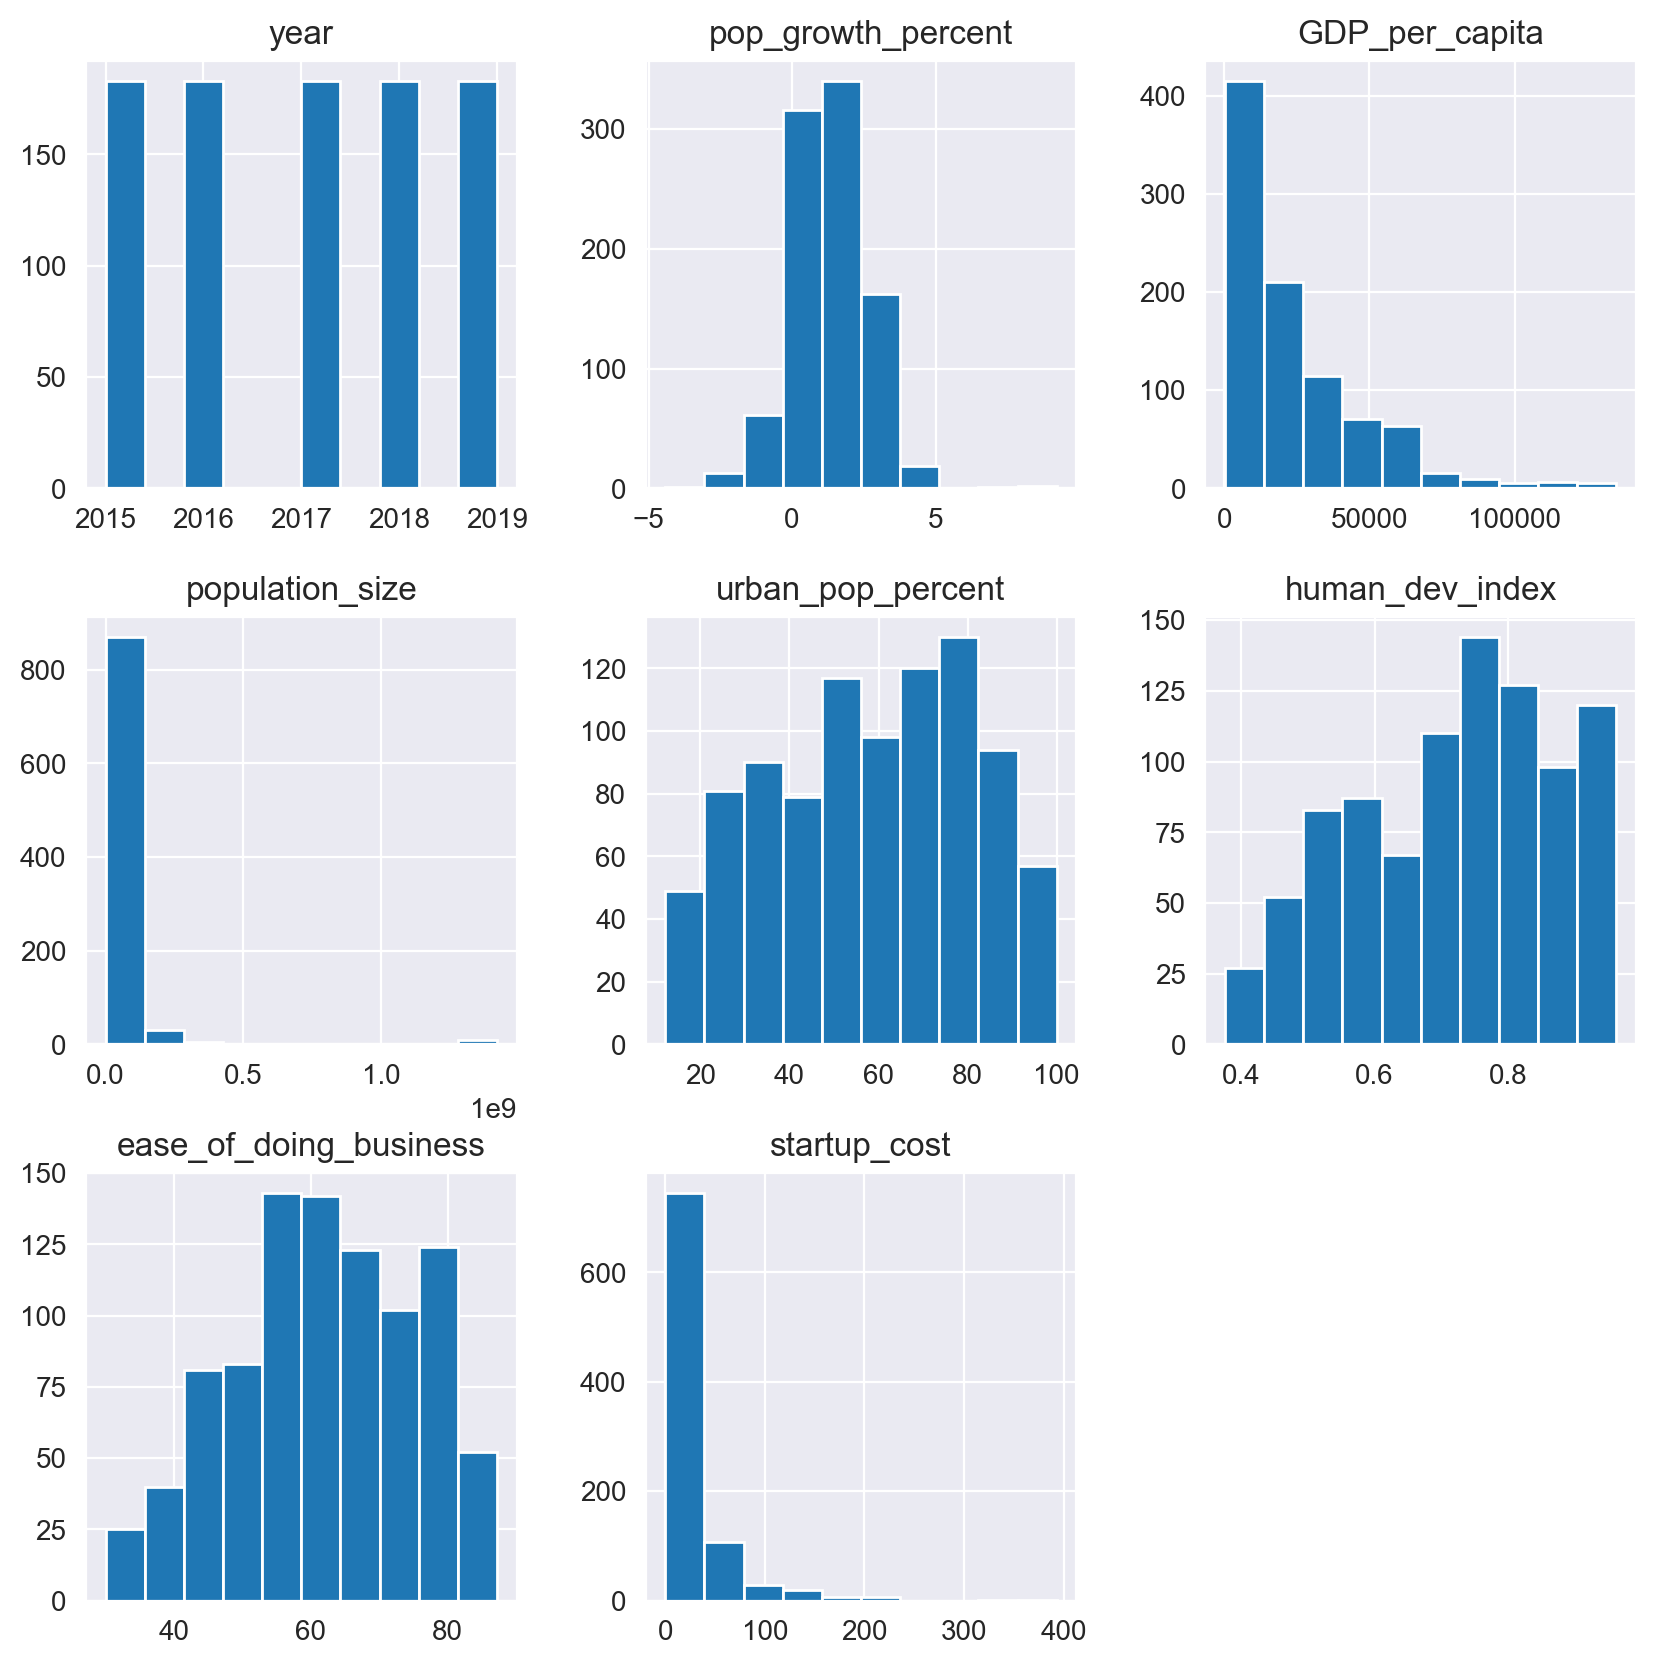

In [77]:
df.hist(figsize=(10, 10));
plt.show()

- The distribution of Gross Domestic Product (GDP) per capita is right-skewed.  
- The distribution of the Cost of Business Start-Up Procedures is also right-skewed.  
- The distribution of the population growth percentage follows a normal distribution.  
- The distributions of the Ease of Doing Business Index and the Human Development Index are slightly left-skewed.  

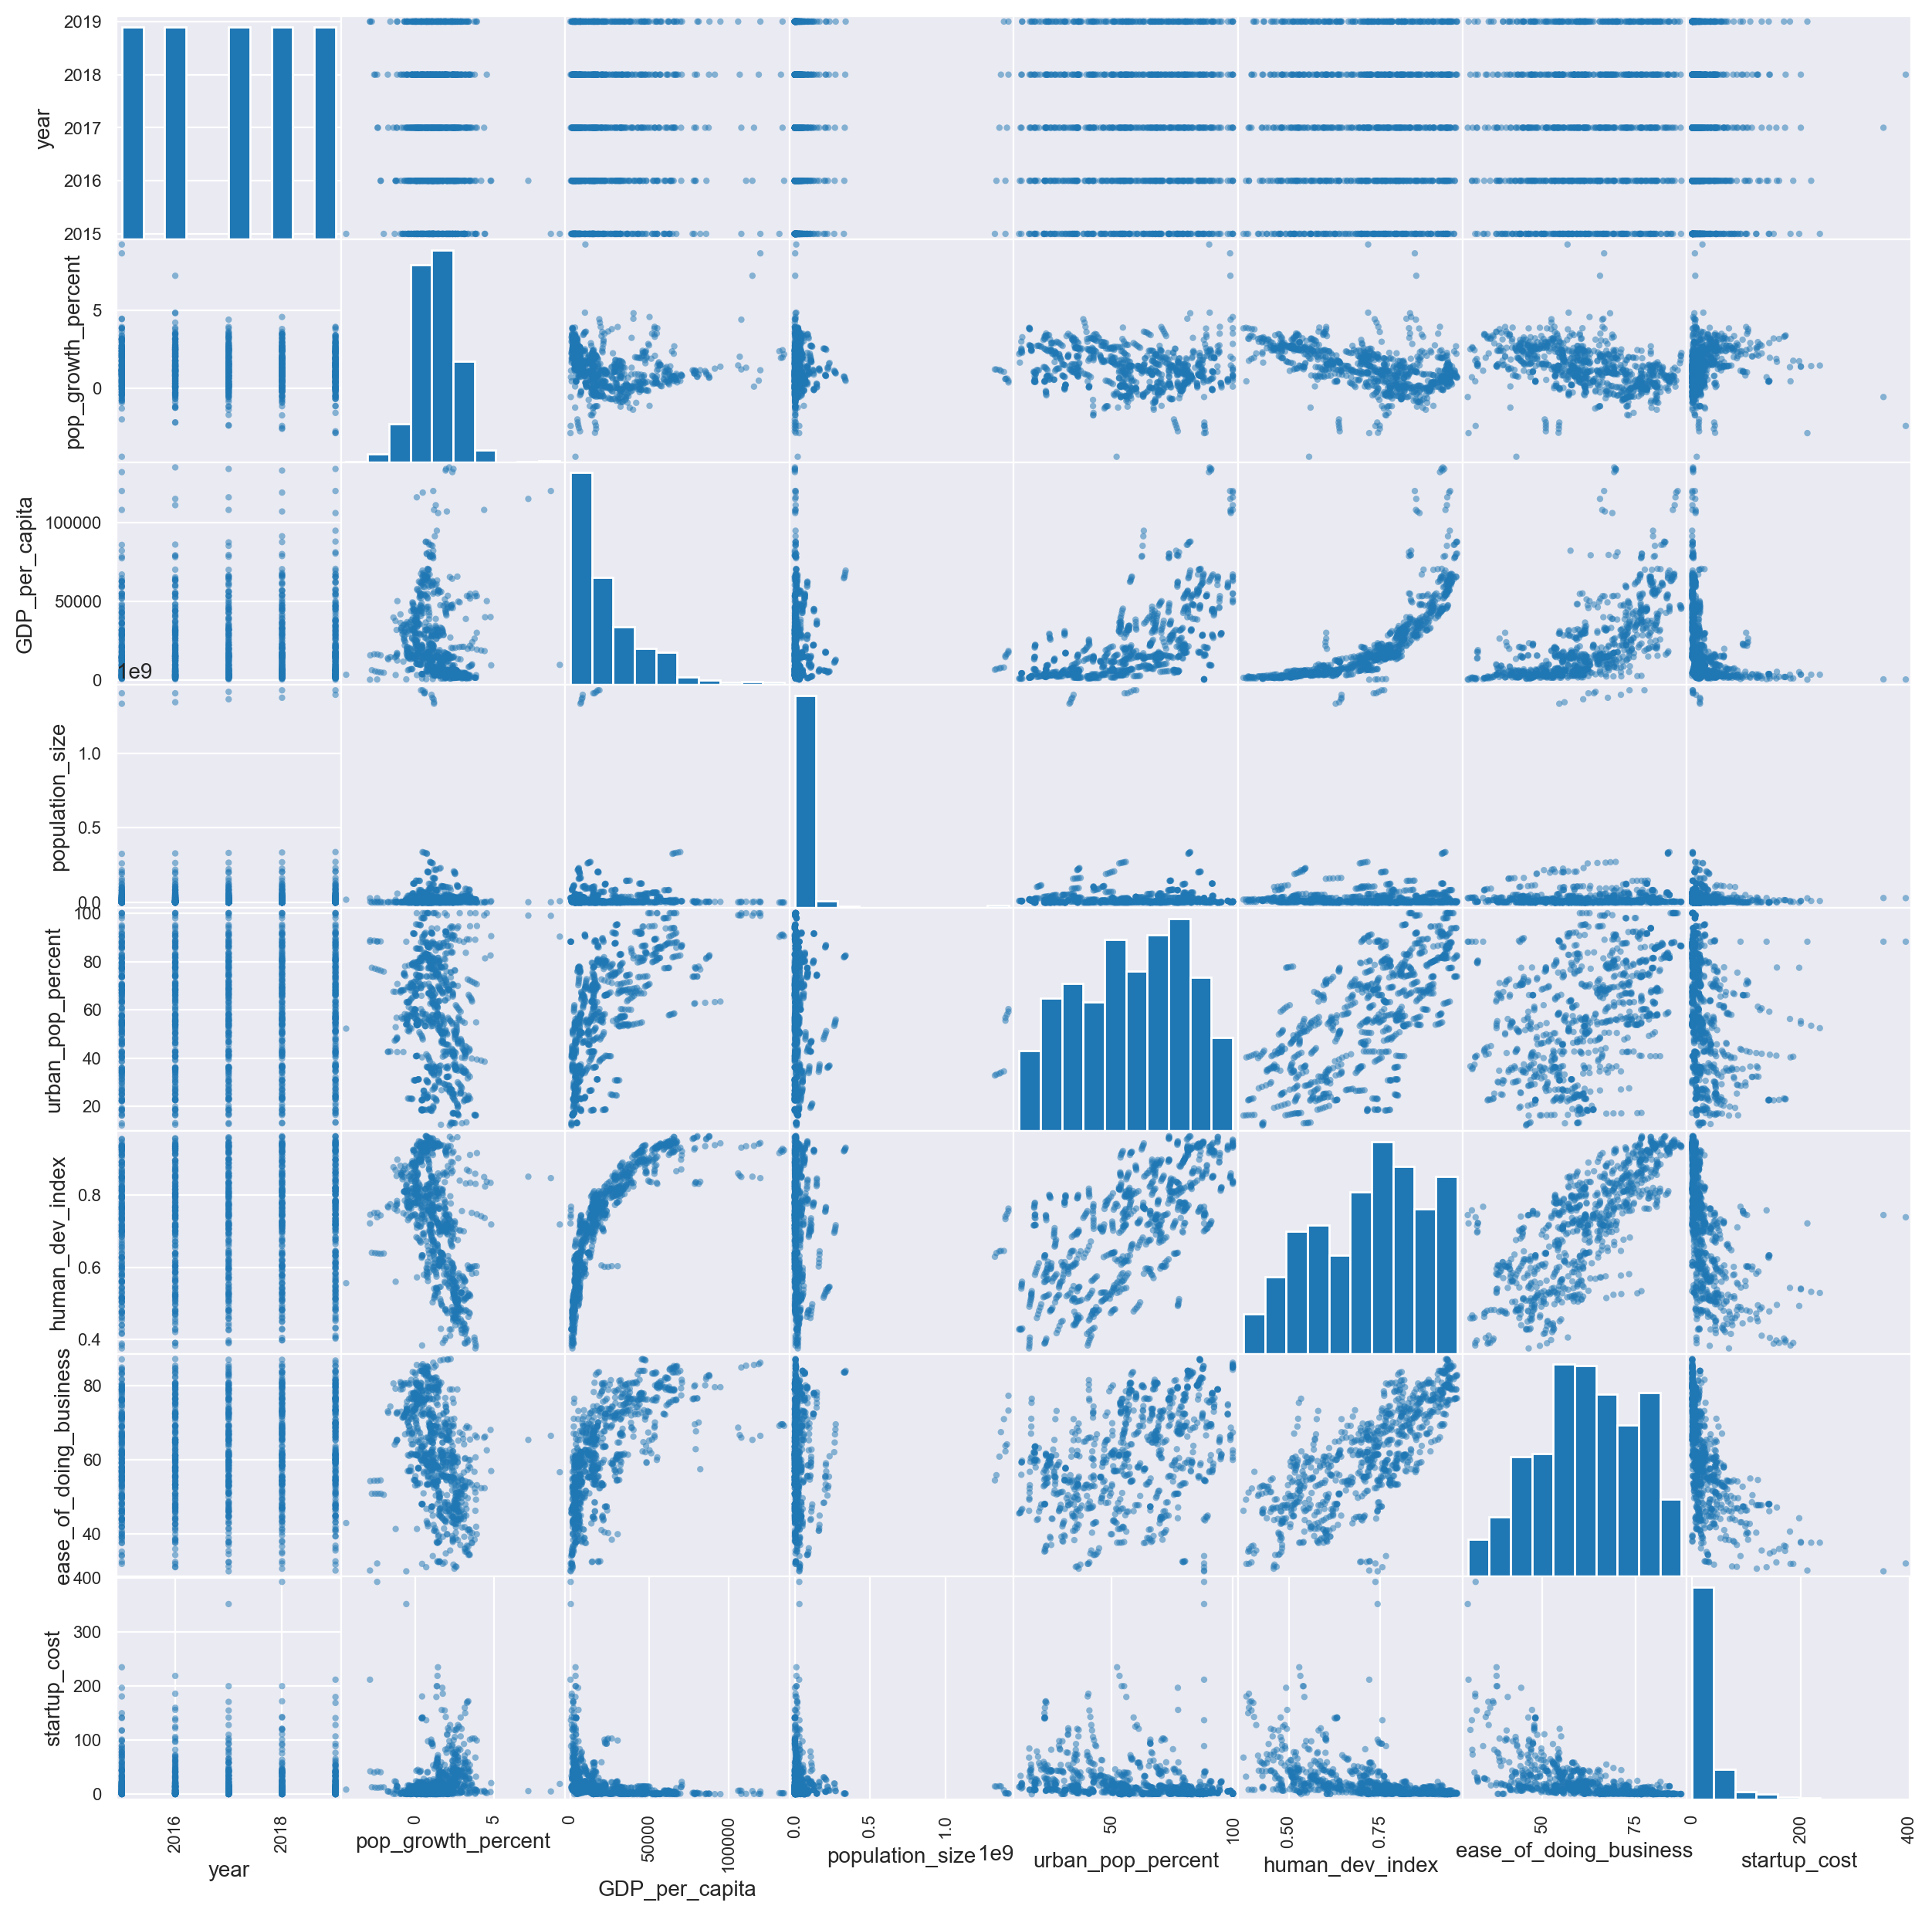

In [79]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));
plt.show()

- The Human Development Index (HDI) and the Ease of Doing Business Index show a positive correlation.  
- The Human Development Index (HDI) and the Urban Population Percentage also demonstrate a positive correlation.  
- The Cost of Business Start-Up Procedures and the Ease of Doing Business Index exhibit a negative correlation.  

Since we are going to answer questions about the data for the most recent year, which is 2019, let's filter the dataset accordingly.

In [82]:
df_19 = df[df.year == 2019]
print(df_19.year.value_counts())
df_19 = df_19.drop('year', axis=1)

year
2019    183
Name: count, dtype: int64


### Draw Conclustions
Let's answer our questions about the data to extract insights and trends that will help stakeholders make informed decisions about the countries they should invest in.

In [84]:
title_fontdict = {
    'fontsize': 18,           # Font size
    'fontweight': 'bold',     # Bold font
    'fontstyle': 'normal',    # Normal style (can be 'italic' or 'oblique')
    'fontfamily': 'sans-serif',  # Font family (e.g., 'serif', 'sans-serif', 'monospace')
    'color': 'black',         # Text color
}

label_fontdict = {
    'fontsize': 14,           # Font size
    'fontweight': 'normal',   # Normal weight (can be 'bold', 'light', etc.)
    'fontstyle': 'normal',    # Normal style (can be 'italic' or 'oblique')
    'fontfamily': 'sans-serif',  # Font family (e.g., 'serif', 'sans-serif', 'monospace')
}

In [85]:
def format_tick_labels(nums):
    """Formats numbers into human-readable strings with metric suffixes.

    Converts numbers to strings with appropriate metric suffixes (k, M, B, T),
    preserving decimal precision where needed. Handles negative numbers and
    includes proper rounding.

    Args:
        nums (list[int/float]): List of numbers to convert.

    Returns:
        list[str]: List of formatted strings using metric suffixes:
            - < 1000: no suffix (e.g., '867')
            - >= 1000: k (e.g., '1.2k')
            - >= 1M: M (e.g., '3.4M')
            - >= 1B: B (e.g., '2.5B')
            - >= 1T: T (e.g., '1.2T')

    Example:
        >>> format_tick_labels([867, 1234, 2500000, 3500000000, -1234567])
        ['867', '1.2k', '2.5M', '3.5B', '-1.2M']
    """
    suffixes = ['', 'k', 'M', 'B', 'T']
    
    def _format_number(n):
        n = float(n)
        magnitude = 0
        abs_n = abs(n)
        
        # Find the appropriate magnitude
        while abs_n >= 1000 and magnitude < len(suffixes) - 1:
            magnitude += 1
            abs_n /= 1000.0
            
        # Round to 1 decimal place if there's a decimal component
        formatted = f'{abs_n:.1f}'.rstrip('0').rstrip('.')
        
        # Add negative sign if needed
        if n < 0:
            formatted = f'-{formatted}'
            
        return f'{formatted}{suffixes[magnitude]}'
    
    return [_format_number(n) for n in nums]

def plot_indicator_by_country(df, indicator, title, xlabel=None, ylabel=None, format_xticks=False, top_result=True):
    """Creates a horizontal bar plot showing the top 10 countries for a given indicator.

    Takes a DataFrame with country and indicator data, and creates a horizontal bar plot 
    showing the top 10 countries with the highest values for the specified indicator.
    The function automatically sorts the data and displays the result.

    Args:
        df (pandas.DataFrame): DataFrame containing at least 'country' column and the indicator column.
        indicator (str): Name of the column in df to plot.
        title (str): Title of the plot.
        xlabel (str, optional): Label for x-axis. Defaults to None.
        ylabel (str, optional): Label for y-axis. Defaults to None.
        xticks (bool, optional): Whether to format x-axis tick labels. Defaults to False.

    Returns:
        None: Displays the plot using plt.show()

    Example:
        >>> df = pd.DataFrame({
        ...     'country': ['USA', 'China', 'Japan'],
        ...     'gdp': [20.94, 14.72, 5.06]
        ... })
        >>> plot_indicator_by_country(df, 'gdp', 'GDP by Country', 'GDP (Trillion USD)', 'Country', xticks=True)
    """
    results = None
    if top_result:
        # Get top 10 countries
        results = df.groupby('country')[indicator].first().sort_values(ascending=True)[-10:]
    else:
        results = df.groupby('country')[indicator].first().sort_values(ascending=True)[:10]
    # Create positions for the bars
    positions = np.arange(len(results))
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.barh(positions, results.values)
    
    # Set country names on y-axis
    plt.yticks(positions, results.index)
    
    # Add labels and title
    if title:
        plt.title(title, fontdict=title_fontdict, pad=20)
    if xlabel:
        plt.xlabel(xlabel, fontdict=label_fontdict, labelpad=10)
    if ylabel:
        plt.ylabel(ylabel, fontdict=label_fontdict, labelpad=10)
        
    # Format x-axis ticks if requested
    if format_xticks:
        current_ticks = plt.xticks()[0]  # Get current tick positions
        plt.xticks(current_ticks, format_tick_labels(current_ticks))
    
    # Add spacing and ensure layout looks good
    plt.margins(x=0.1)
    plt.tight_layout()
    
    plt.show()
    return results.index.tolist()[-10:] if top_result else results.index.tolist()[:10]

#### 1. Which countries had the highest GDP per capita in 2019? List the top 10.  

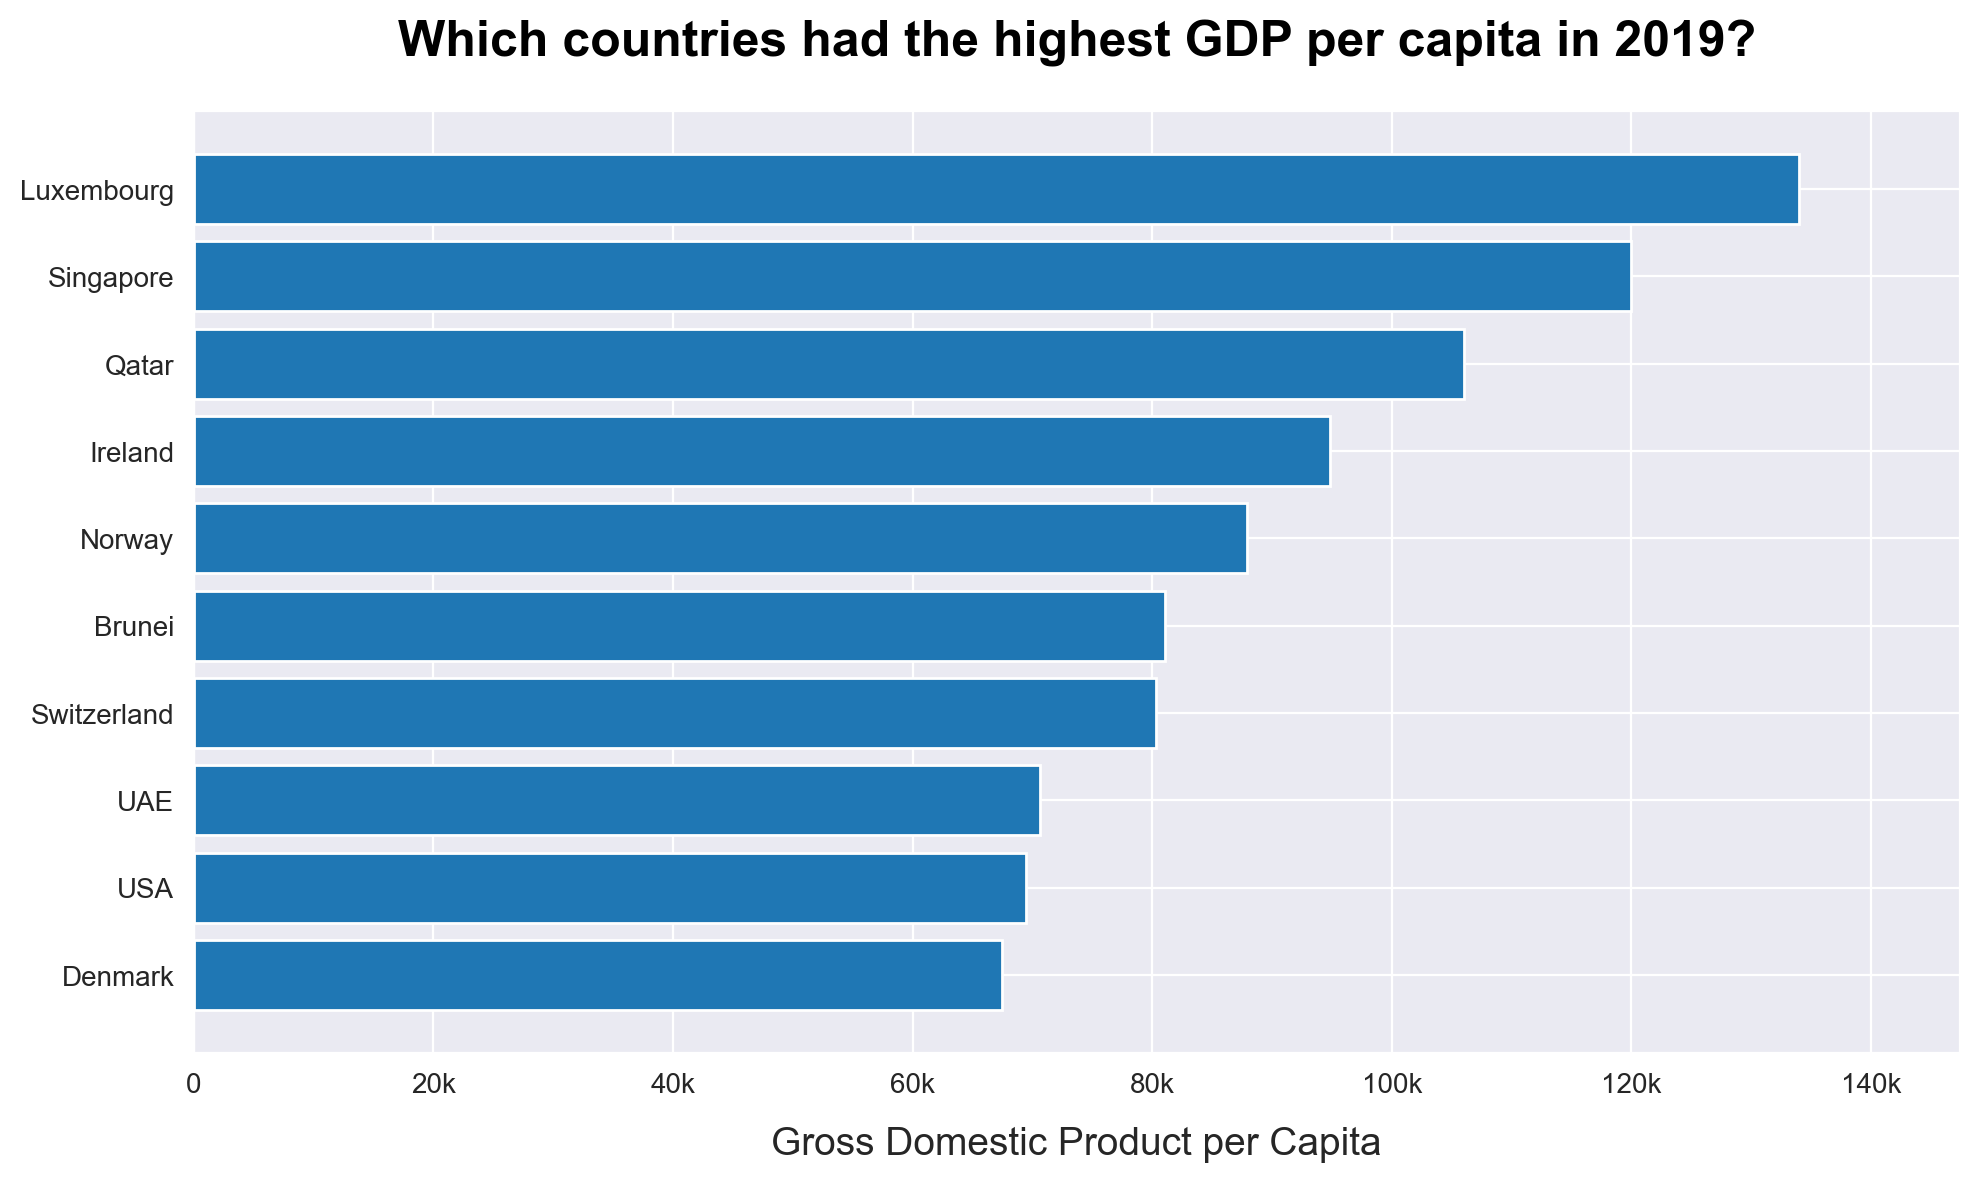

In [87]:
top_countries = []
top_countries += plot_indicator_by_country(df_19, indicator='GDP_per_capita', 
                          title= 'Which countries had the highest GDP per capita in 2019?',
                          xlabel= 'Gross Domestic Product per Capita', format_xticks=True)

- In 2019, Luxembourge has the highest domestic gross product per captia which imply that its citizens may have high purchasing power and market potential.

#### 2. Which countries had the largest population sizes in 2019? List the top 10.  

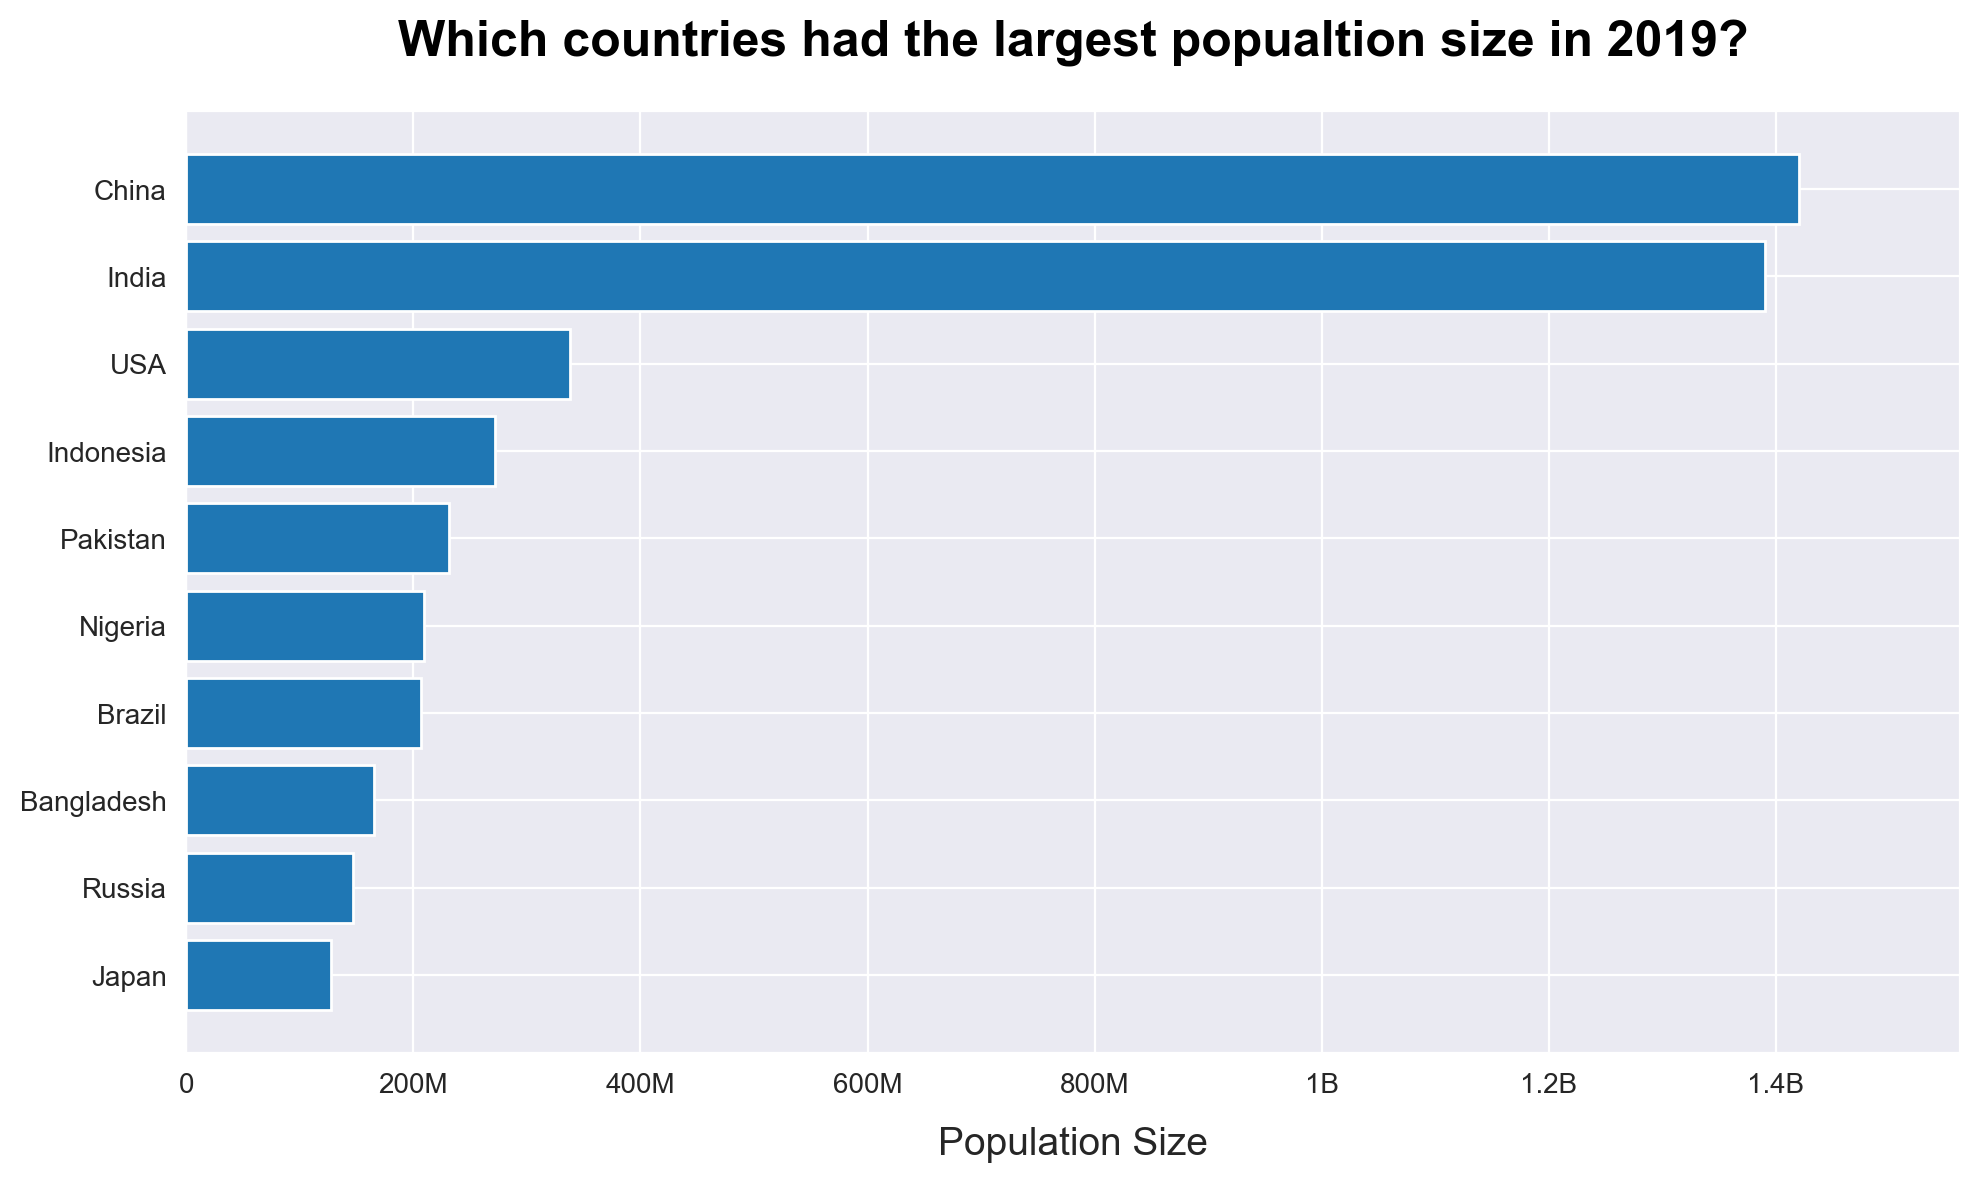

In [90]:
top_countries += plot_indicator_by_country(df_19, indicator='population_size', 
                          title='Which countries had the largest popualtion size in 2019?', 
                          xlabel='Population Size',
                         format_xticks=True)


- China and India have significantly larger populations compared to other countries, which indicates a substantial potential customer base for businesses.
- The USA is one of the top 10 countries with both a high GDP per capita and a large population size, making it a potentially lucrative market with strong purchasing power and a substantial customer base.

#### 3. Which countries had the highest population growth rates in 2019? List the top 10. 

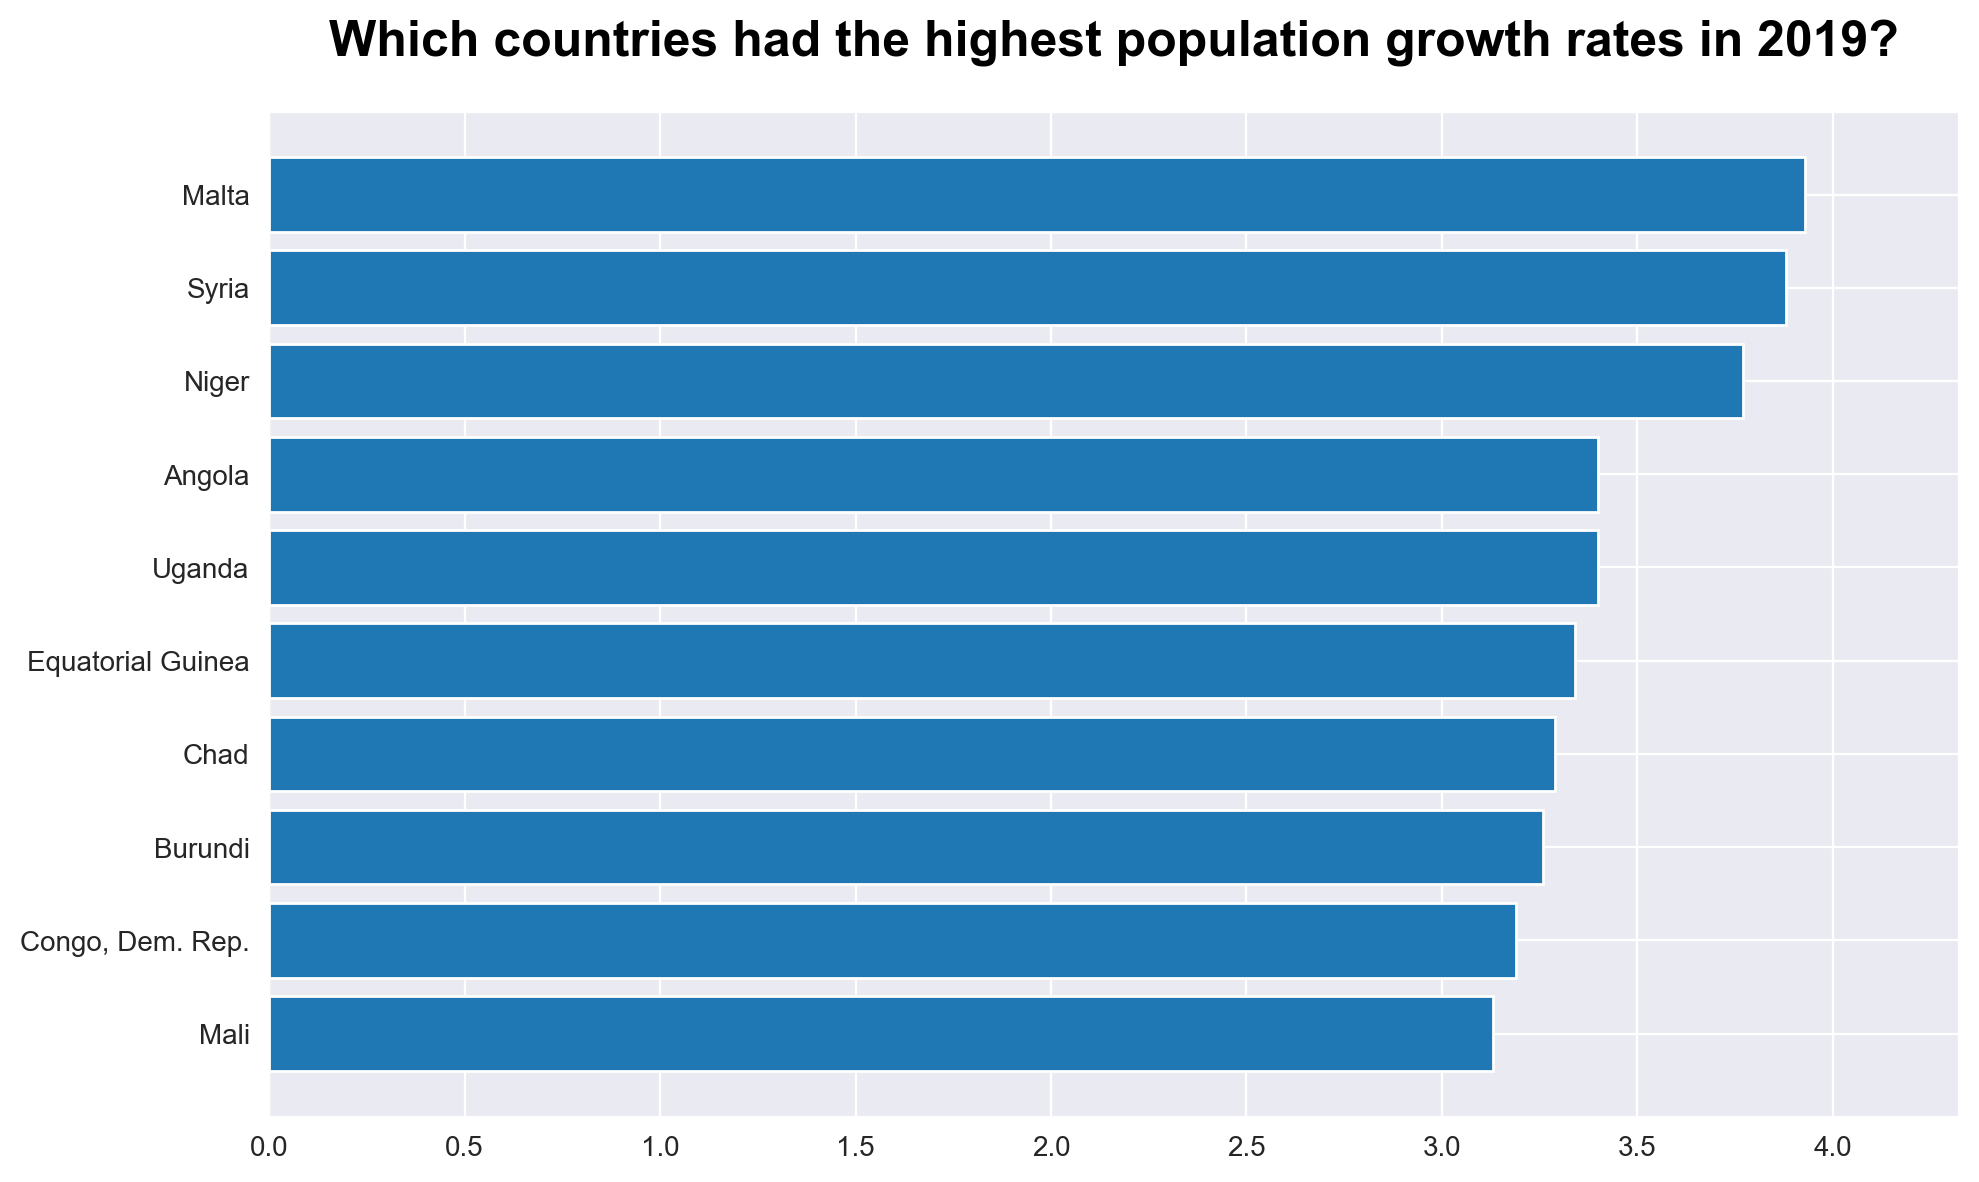

In [93]:
top_countries += plot_indicator_by_country(df_19, indicator='pop_growth_percent', 
                          title='Which countries had the highest population growth rates in 2019?')

- Malta, Syria, and Niger have the highest population growth percentages, making them strong candidates for businesses that target products for children. These countries are expected to have growing markets due to their increasing population size. Since Syria do not have political or economic stability, I don't think it will be a good canditate to invest in.

#### 4. Which countries had the highest Human Development Index (HDI) in 2019? List the top 10.  


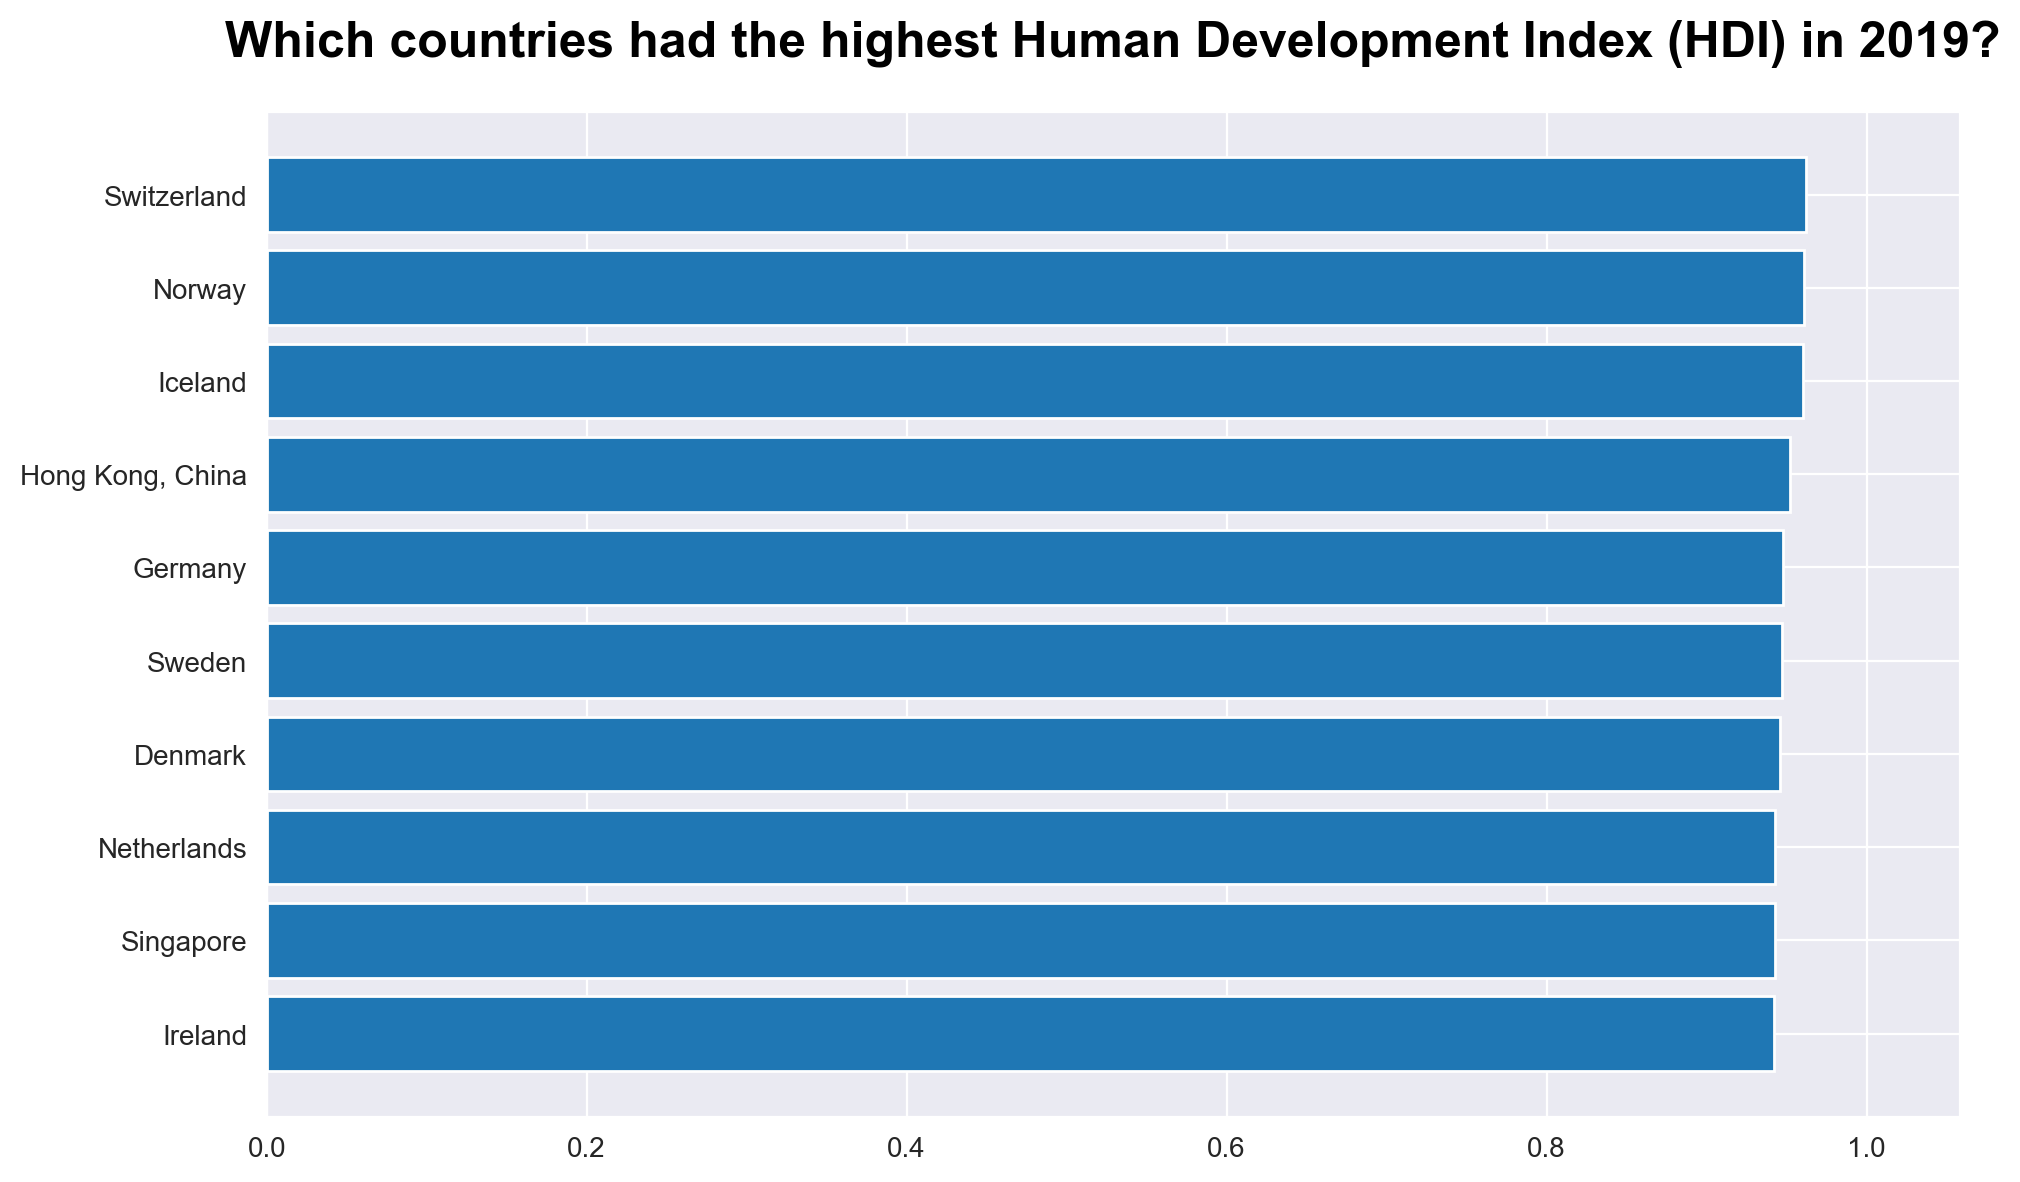

In [96]:
top_countries += plot_indicator_by_country(df_19, indicator='human_dev_index', 
                          title='Which countries had the highest Human Development Index (HDI) in 2019?')

- Switzerland, Norway, and Iceland have the highest Human Development Index (HDI), suggesting a higher likelihood of a skilled and educated workforce. This is crucial for businesses that require specialized skills to thrive.

#### 5. Which countries had the best Ease of Doing Business scores in 2019? List the top 10.  


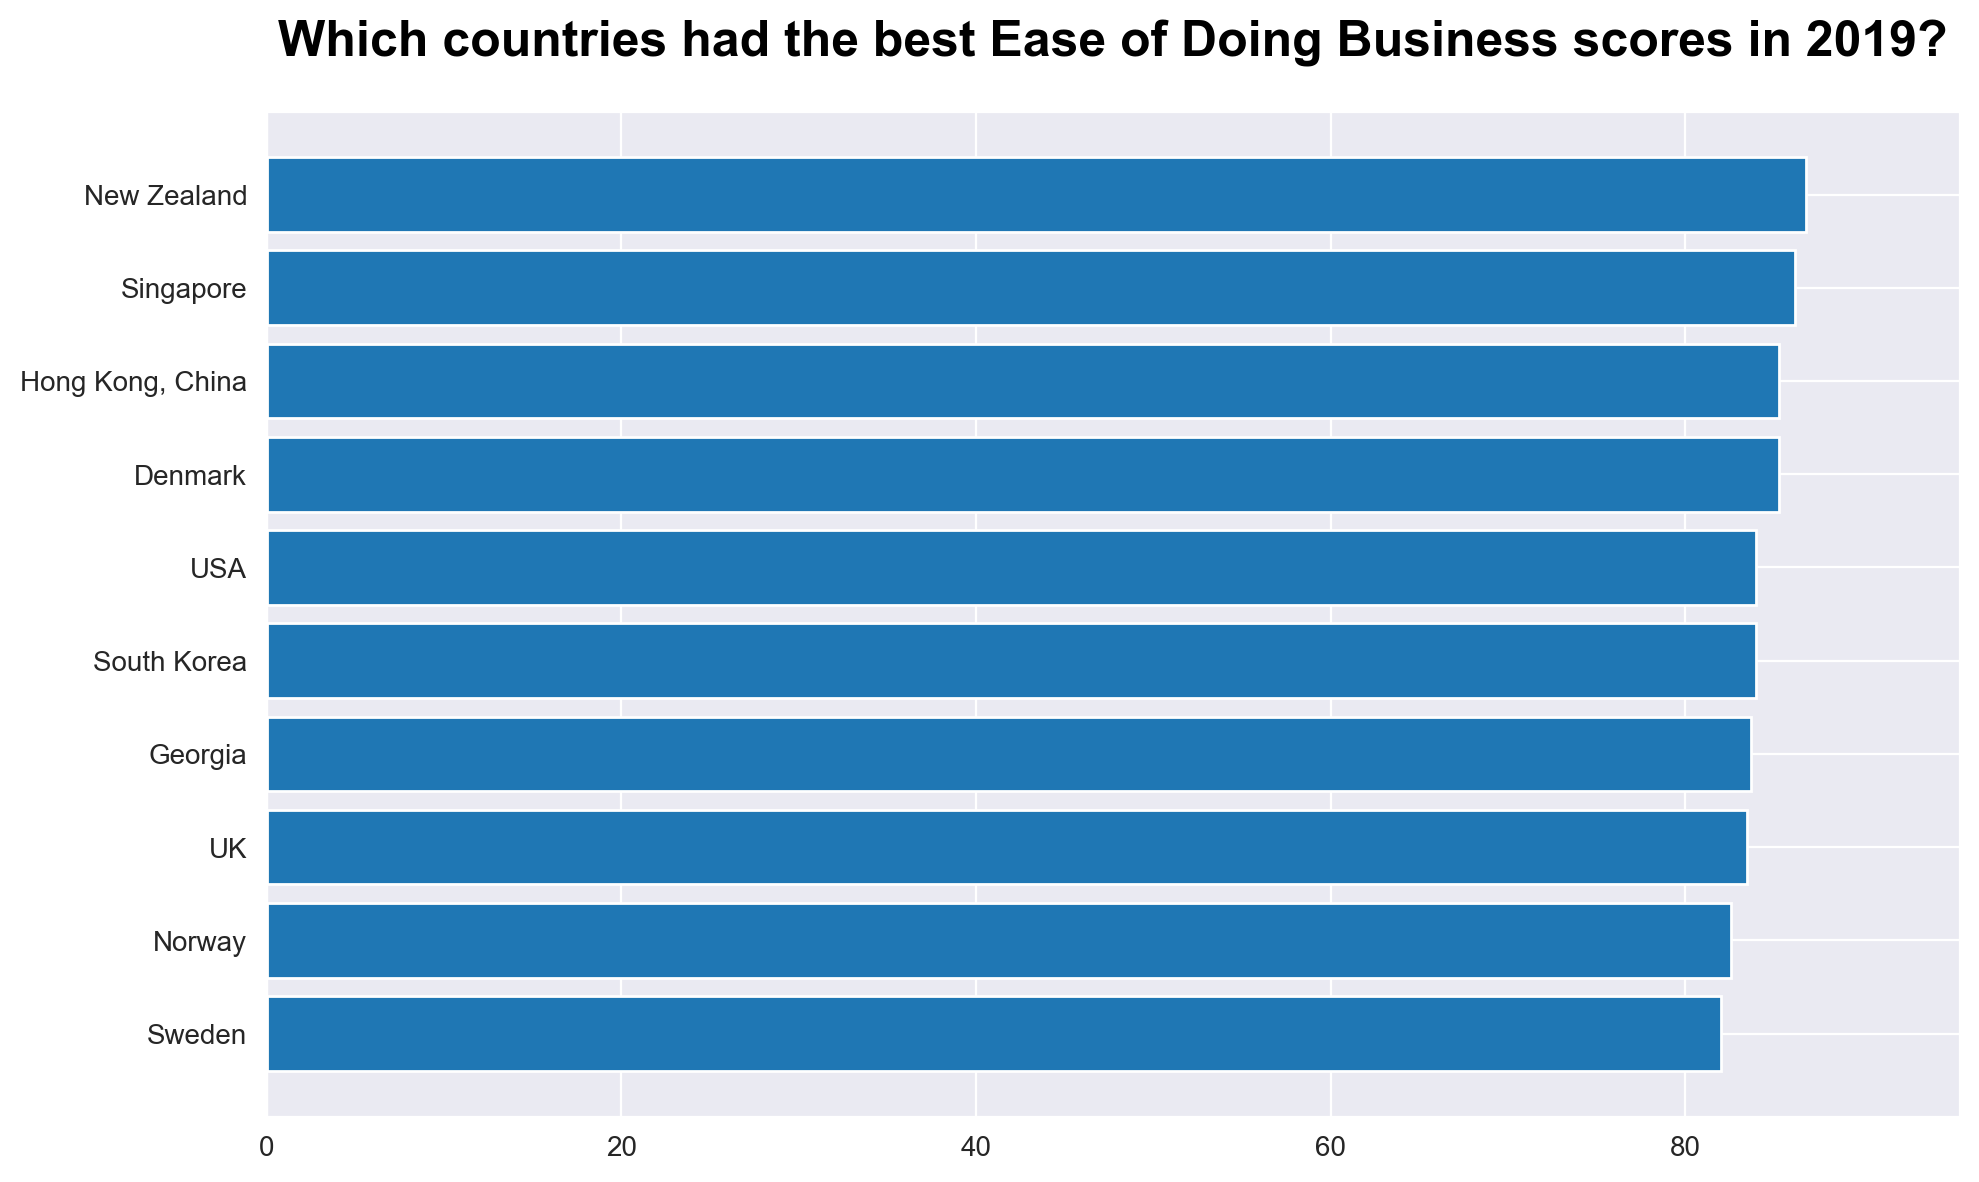

In [99]:
top_countries += plot_indicator_by_country(df_19, indicator='ease_of_doing_business', 
                          title='Which countries had the best Ease of Doing Business scores in 2019?')

- New Zealand, Singapore, and China have the highest Ease of Doing Business scores, reflecting favorable regulatory environments and the ease of starting and operating a business. Additionally, some countries excel in both Ease of Doing Business and Human Development Index (HDI), indicating the presence of skilled labor and a business-friendly environment, such as Singapore and China

#### 6. Which countries had the lowest costs for business start-up procedures in 2019? List the top 10.  


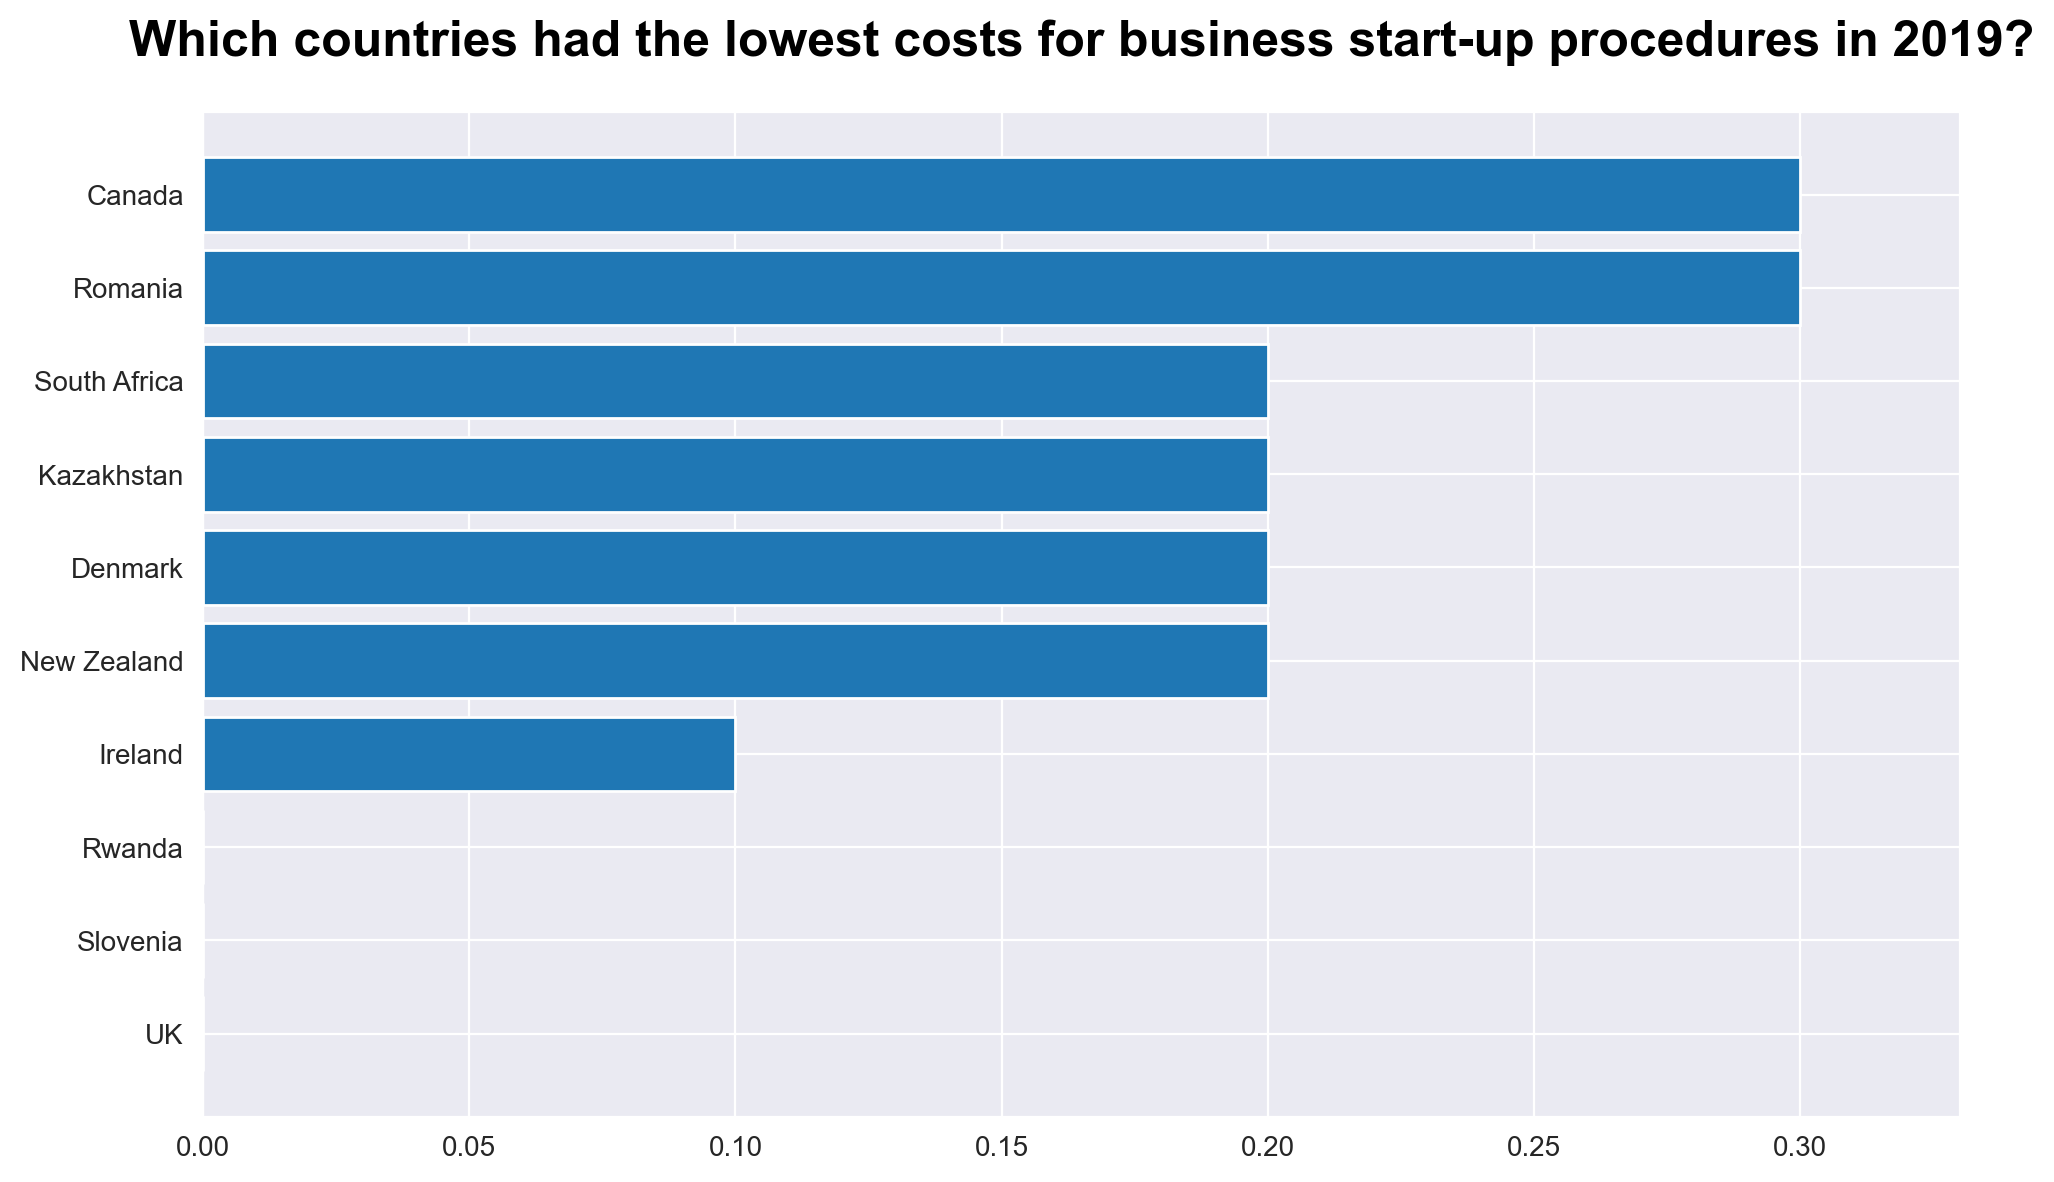

In [102]:
top_countries += plot_indicator_by_country(df_19, indicator='startup_cost', 
                          title='Which countries had the lowest costs for business start-up procedures in 2019?', 
                          top_result=False)

- United Kingdom, Slovenia, and Rwanda have no costs associated with business start-up procedures, making them attractive for new businesses. Additionally, countries with high ease of doing business scores generally tend to have lower costs for business start-up procedures, creating a favorable environment for entrepreneurs.

#### 7. Which countries had the highest urban population rates in 2019? List the top 10.  


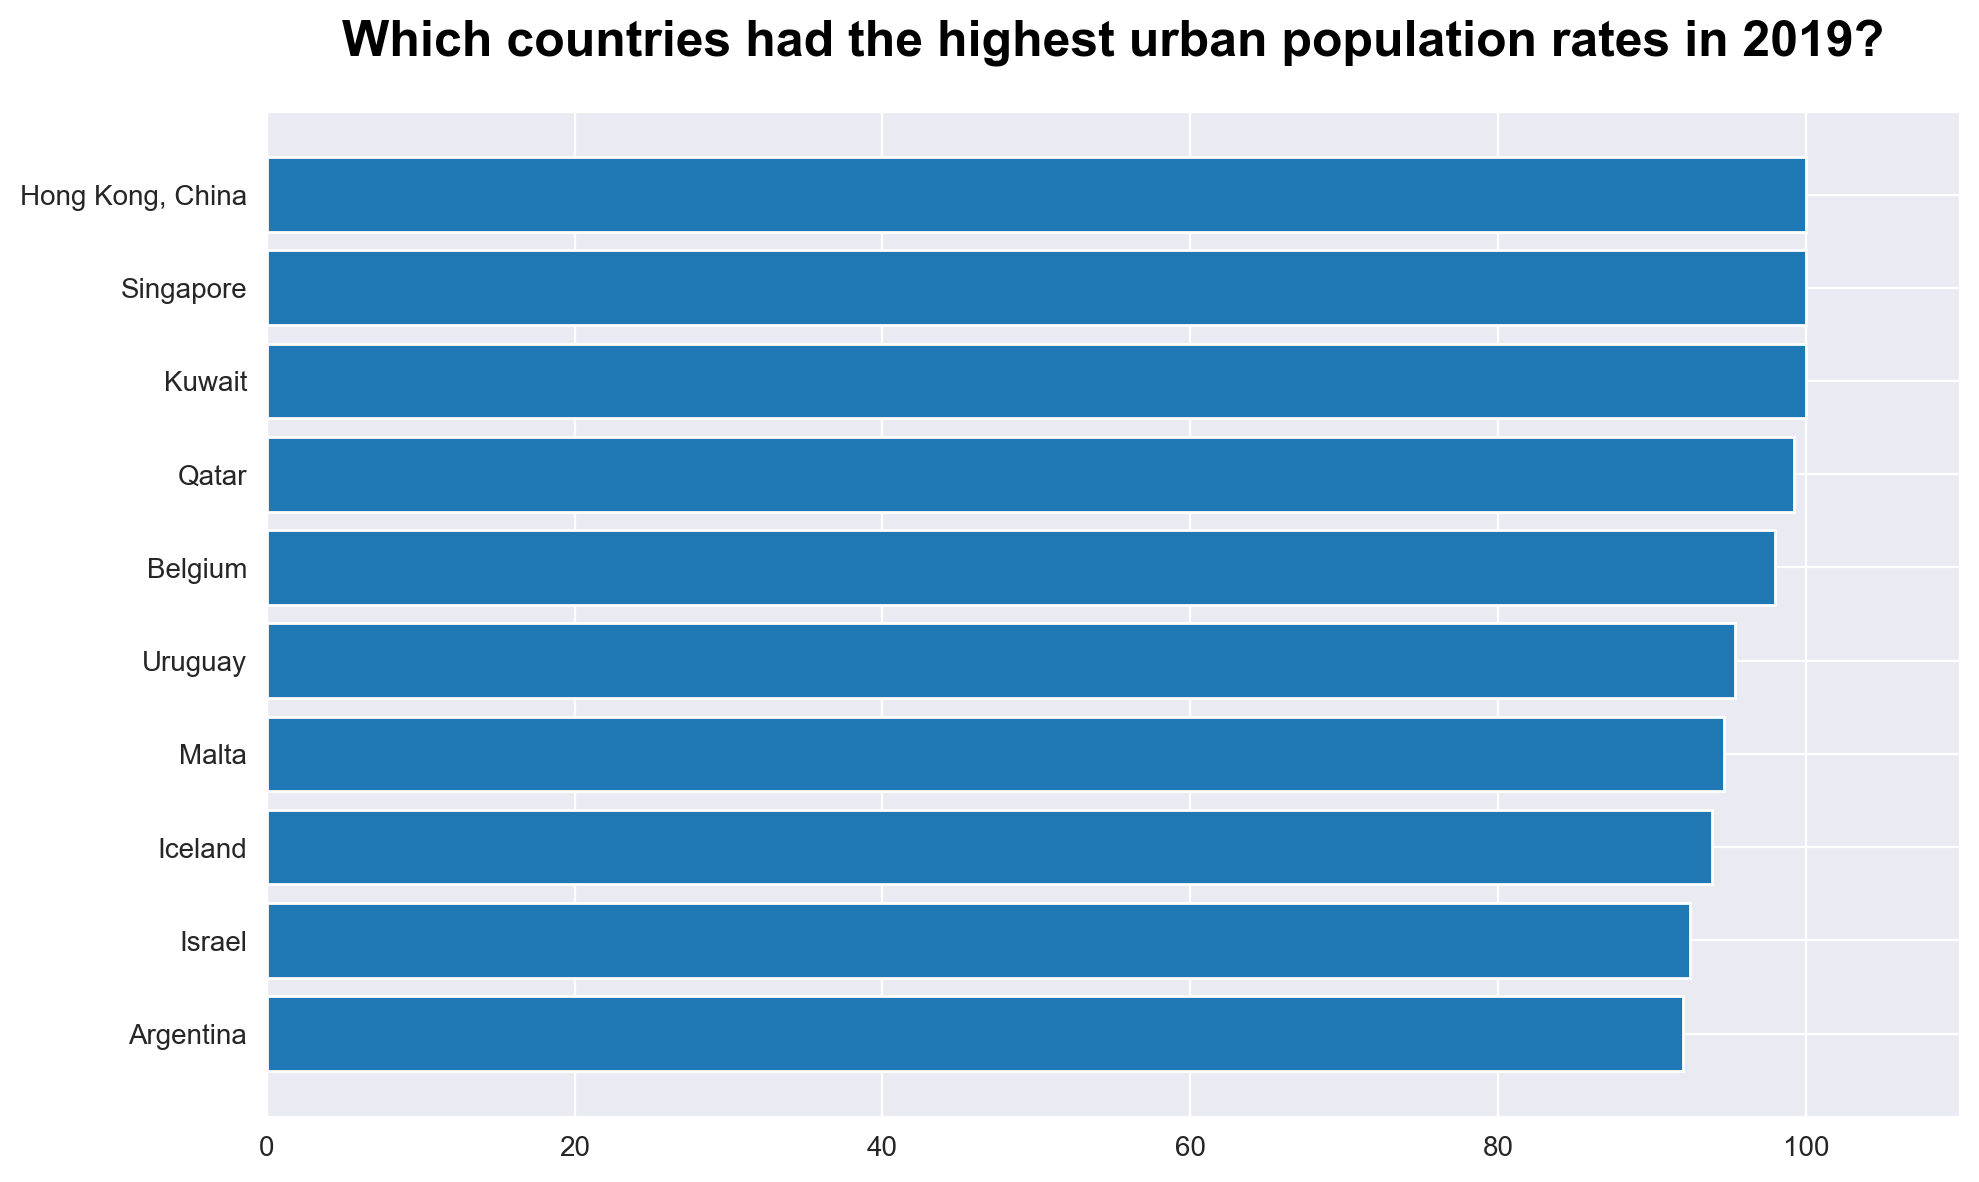

In [105]:
top_countries += plot_indicator_by_country(df_19, indicator='urban_pop_percent', 
                          title='Which countries had the highest urban population rates in 2019?')

- China, Singapore, and Kuwait have 100% urban populations, which suggests they are likely to have better infrastructure. Urban areas also offer advantages for businesses due to easier targeting of marketing and distribution efforts, making these countries attractive for investment.

#### 8. What is the relationship between the Ease of Doing Business score and the cost of business start-up procedures by country?  


In [108]:
top_countries = set(top_countries) 
len(top_countries)

49

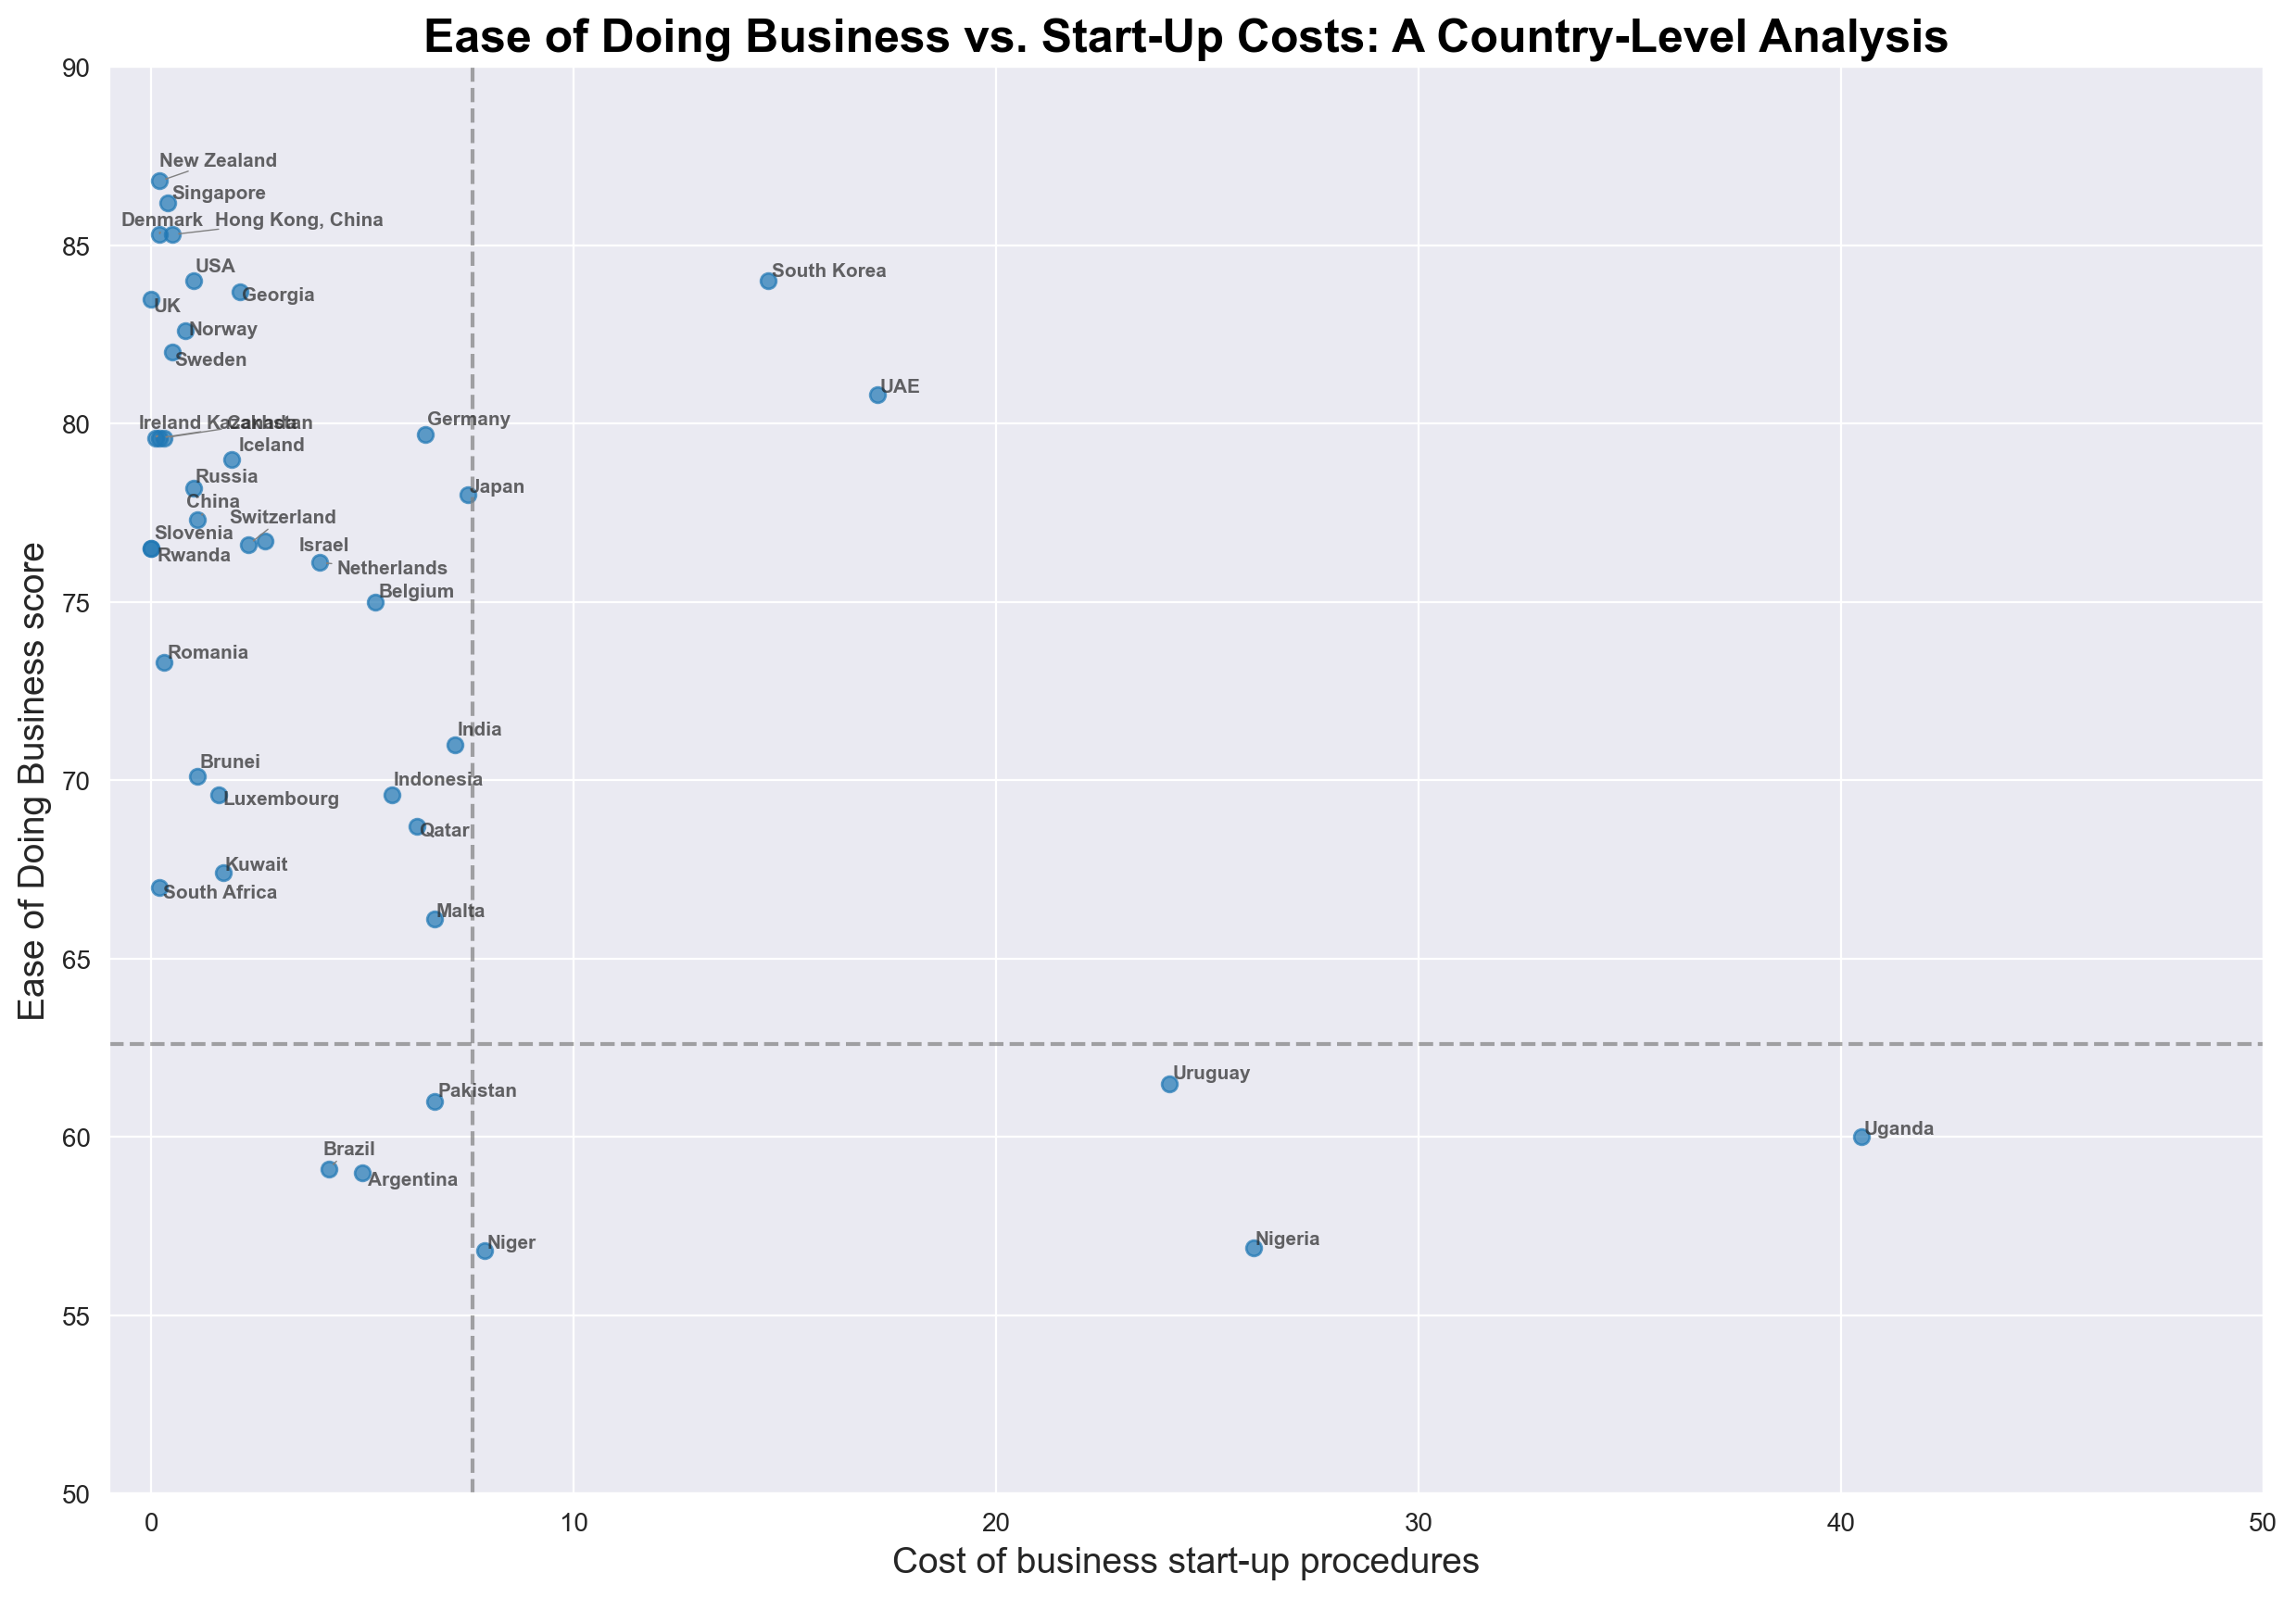

In [109]:
# Create the scatter plot
plt.figure(figsize=(15, 10))
scatter = plt.scatter(df_19.query('country in @top_countries').startup_cost, 
                      df_19.query('country in @top_countries').ease_of_doing_business, 
                      alpha=0.7)

# Add title and labels
plt.title("Ease of Doing Business vs. Start-Up Costs: A Country-Level Analysis", fontdict=title_fontdict)
plt.xlabel('Cost of business start-up procedures', fontdict=label_fontdict)
plt.ylabel('Ease of Doing Business score', fontdict=label_fontdict)

# Add median lines
plt.axhline(y=df_19.ease_of_doing_business.median(), color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=df_19.startup_cost.median(), color='gray', linestyle='--', alpha=0.7)
plt.xlim([-1, 50])
plt.ylim([50, 90])
# Prepare text annotations
texts = []
for c in top_countries:
    x_val = df_19[df_19.country == c]['startup_cost'].values[0] 
    y_val = df_19[df_19.country == c]['ease_of_doing_business'].values[0]
    if x_val < 50 and y_val > 50:
        texts.append(plt.text(x=x_val, 
                              y=y_val, 
                              s=c, fontsize=7.5, alpha=0.7, fontweight='bold'))

# Adjust text labels to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

plt.show()

#### 9. What is the relationship between GDP per capita and the Human Development Index by country?  


#### 10. What is the relationship between population size and GDP per capita by country?  


#### 11. How did the Human Development Index (HDI) change over time for the top 10 countries in 2019?  


#### 12. How did the Ease of Doing Business score change over time for the top 10 countries in 2019?  


#### 13. How did the costs for business start-up procedures change over time for the 10 lowest-cost countries in 2019?  